<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Download-Data" data-toc-modified-id="Download-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Download Data</a></span></li><li><span><a href="#Split-DataFrame-For-Train-Validation-and-Test" data-toc-modified-id="Split-DataFrame-For-Train-Validation-and-Test-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Split DataFrame For Train Validation and Test</a></span></li><li><span><a href="#Build-a-Benchmark-Model" data-toc-modified-id="Build-a-Benchmark-Model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Build a Benchmark Model</a></span><ul class="toc-item"><li><span><a href="#make-most-basic-features" data-toc-modified-id="make-most-basic-features-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>make most basic features</a></span></li><li><span><a href="#make-benchmark-model" data-toc-modified-id="make-benchmark-model-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>make benchmark model</a></span></li><li><span><a href="#walkforward-function" data-toc-modified-id="walkforward-function-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>walkforward function</a></span></li><li><span><a href="#look-at-results" data-toc-modified-id="look-at-results-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>look at results</a></span></li></ul></li><li><span><a href="#Build-a-More-Advanced-Model" data-toc-modified-id="Build-a-More-Advanced-Model-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Build a More Advanced Model</a></span><ul class="toc-item"><li><span><a href="#make-xy-with-new-features" data-toc-modified-id="make-xy-with-new-features-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>make xy with new features</a></span></li><li><span><a href="#run-walkforward-test" data-toc-modified-id="run-walkforward-test-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>run walkforward test</a></span></li><li><span><a href="#evaluate-results" data-toc-modified-id="evaluate-results-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>evaluate results</a></span></li></ul></li><li><span><a href="#Build-a-Model-With-Market-Marketstructure-features" data-toc-modified-id="Build-a-Model-With-Market-Marketstructure-features-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Build a Model With Market Marketstructure features</a></span><ul class="toc-item"><li><span><a href="#add-features" data-toc-modified-id="add-features-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>add features</a></span></li><li><span><a href="#run-walkforward-test" data-toc-modified-id="run-walkforward-test-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>run walkforward test</a></span></li><li><span><a href="#evaluate-results" data-toc-modified-id="evaluate-results-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>evaluate results</a></span></li></ul></li><li><span><a href="#Feature-Select-for-Technical-Analysis-Features" data-toc-modified-id="Feature-Select-for-Technical-Analysis-Features-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Feature Select for Technical Analysis Features</a></span><ul class="toc-item"><li><span><a href="#use-selected-features-only" data-toc-modified-id="use-selected-features-only-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>use selected features only</a></span></li><li><span><a href="#run-walkforward-test" data-toc-modified-id="run-walkforward-test-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>run walkforward test</a></span></li><li><span><a href="#evaluate-results" data-toc-modified-id="evaluate-results-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>evaluate results</a></span></li><li><span><a href="#let's-attempt-with-tentative-and-selected" data-toc-modified-id="let's-attempt-with-tentative-and-selected-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>let's attempt with tentative and selected</a></span></li><li><span><a href="#run-walkforward" data-toc-modified-id="run-walkforward-7.5"><span class="toc-item-num">7.5&nbsp;&nbsp;</span>run walkforward</a></span></li><li><span><a href="#Evaluate-Results" data-toc-modified-id="Evaluate-Results-7.6"><span class="toc-item-num">7.6&nbsp;&nbsp;</span>Evaluate Results</a></span></li></ul></li><li><span><a href="#Test-model-on-Validation-Set" data-toc-modified-id="Test-model-on-Validation-Set-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Test model on Validation Set</a></span><ul class="toc-item"><li><span><a href="#run-walkforward" data-toc-modified-id="run-walkforward-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>run walkforward</a></span></li><li><span><a href="#evaluate-results" data-toc-modified-id="evaluate-results-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>evaluate results</a></span></li></ul></li></ul></div>

# Imports

In [139]:
%load_ext watermark
%watermark

%load_ext autoreload
%autoreload 2

#%load_ext nb_black


from pathlib import Path

def get_relative_project_dir(project_repo_name=None, partial=True):
    """helper fn to get local project directory"""
    current_working_directory = Path.cwd()
    cwd_parts = current_working_directory.parts
    if partial:
        while project_repo_name not in cwd_parts[-1]:
            current_working_directory = current_working_directory.parent
            cwd_parts = current_working_directory.parts
            if len(cwd_parts) == 1:
                if project_repo_name not in cwd_parts[0]:
                    raise ValueError(
                        f"{project_repo_name} not found in directory tree!"
                    )
    else:
        while cwd_parts[-1] != project_repo_name:
            current_working_directory = current_working_directory.parent
            cwd_parts = current_working_directory.parts
            if len(cwd_parts) == 1:
                if project_repo_name not in cwd_parts[0]:
                    raise ValueError(
                        f"{project_repo_name} not found in directory tree!"
                    )
    return current_working_directory

# import visual tools
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns_params = {
    "xtick.major.size": 2,
    "ytick.major.size": 2,
    "font.size": 12,
    "font.weight": "medium",
    "figure.figsize": (10, 7),
}
sns.set_theme(
    context="notebook",
    style="darkgrid",
    # palette=sns.color_palette("magma"),
    rc=sns_params,
)
savefig_kwds = dict(dpi=90, bbox_inches="tight", frameon=True, format="png")

# import util libs
from timeutils import Stopwatch
from tqdm import tqdm
import warnings

from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import matthews_corrcoef
from statsmodels.tsa.stattools import acf
from timeseries_features import (
    hurst,
    permutation_entropy,
    kyles_lambda,
    bekker_parkinson_vol,
    amihuds_lambda,
    hasbroucks_lambda,
    corwin_schultz_hl,
    roll_measure,
)
import yfinance as yf
import quantstats as qs
from ta import add_all_ta_features
from BorutaShap import BorutaShap

warnings.filterwarnings("ignore")
import watermark.watermark as watermark
# ---------------------------------------------------
# THESE ARE VARIABLES FOR EASILY ACCESSING DIFFERENT
# DIRECTORIES FOR ACCESSING AND SAVING DATA AND IMAGES
# IF NECESSARY. CHANGE THEM TO MATCH YOUR DIRECTORY
# STRUCTURE.
# ---------------------------------------------------

REPO_NAME = "blackarbs_algo_strategy_dev"  # CHANGE TO MATCH YOUR REPO NAME
print("\n", REPO_NAME)
project_dir = get_relative_project_dir(REPO_NAME)
data_dir = project_dir / "data"
external = data_dir / "external"
processed = data_dir / "processed"


def cprint(df: pd.DataFrame, nrows: int = None):
    """
    Custom dataframe print function
    """
    if not isinstance(df, (pd.DataFrame,)):
        try:
            df = df.to_frame()
        except:
            raise ValueError("object cannot be coerced to df")

    if not nrows:
        nrows = 5
    print("*" * 79)
    print("dataframe information")
    print("-" * 79)
    print(f"HEAD num rows: {nrows}")
    print(df.head(nrows))
    print("-" * 25)
    print(f"TAIL num rows: {nrows}")
    print(df.tail(nrows))
    print("-" * 50)
    print(df.info())
    print("*" * 79)
    print()
    return


print()
%watermark -v --iversions

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Last updated: 2023-02-03T20:38:38.261316-03:00

Python implementation: CPython
Python version       : 3.9.0
IPython version      : 8.1.1

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 158 Stepping 10, GenuineIntel
CPU cores   : 12
Architecture: 64bit

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload

 blackarbs_algo_strategy_dev

Python implementation: CPython
Python version       : 3.9.0
IPython version      : 8.1.1

numpy     : 1.23.0
matplotlib: 3.6.0
seaborn   : 0.12.0
json      : 2.0.9
pandas    : 1.4.1
yfinance  : 0.1.75
quantstats: 0.0.59



<IPython.core.display.Javascript object>

# Download Data

In [2]:
def process_data(indf, resample_freq="1H"):
    out_df = indf.copy()
    # resample
    out_df = out_df.resample(resample_freq).agg(
        {"open": "first", "high": max, "low": min, "close": "last", "volume": sum}
    )
    out_df.dropna(inplace=True)
    return out_df

<IPython.core.display.Javascript object>

In [3]:
SYMBOL = "XLF"

raw_df = yf.Ticker(SYMBOL).history(period="max").rename(columns=str.lower)
cprint(raw_df)

-------------------------------------------------------------------------------
dataframe information
-------------------------------------------------------------------------------
                                open       high        low      close  \
Date                                                                    
2023-01-30 00:00:00-05:00  36.060001  36.330002  36.009998  36.070000   
2023-01-31 00:00:00-05:00  36.139999  36.570000  35.970001  36.560001   
2023-02-01 00:00:00-05:00  36.180000  36.880001  36.099998  36.560001   
2023-02-02 00:00:00-05:00  36.759998  36.810001  36.369999  36.660000   
2023-02-03 00:00:00-05:00  36.369999  36.900002  36.360001  36.590000   

                             volume  dividends  stock splits  
Date                                                          
2023-01-30 00:00:00-05:00  31595000        0.0           0.0  
2023-01-31 00:00:00-05:00  30282100        0.0           0.0  
2023-02-01 00:00:00-05:00  51418700        0.0        

<IPython.core.display.Javascript object>

In [4]:
df = process_data(raw_df, resample_freq="1D")
df

open       high        low      close  \
Date                                                                    
1998-12-22 00:00:00-05:00  11.846361  11.846361  11.720084  11.775330   
1998-12-23 00:00:00-05:00  11.727976  11.948960  11.727976  11.948960   
1998-12-24 00:00:00-05:00  11.948963  12.027885  11.909501  12.027885   
1998-12-28 00:00:00-05:00  12.019989  12.019989  11.838467  11.870037   
1998-12-29 00:00:00-05:00  11.885826  11.996319  11.743764  11.996319   
...                              ...        ...        ...        ...   
2023-01-30 00:00:00-05:00  36.060001  36.330002  36.009998  36.070000   
2023-01-31 00:00:00-05:00  36.139999  36.570000  35.970001  36.560001   
2023-02-01 00:00:00-05:00  36.180000  36.880001  36.099998  36.560001   
2023-02-02 00:00:00-05:00  36.759998  36.810001  36.369999  36.660000   
2023-02-03 00:00:00-05:00  36.369999  36.900002  36.360001  36.590000   

                             volume  
Date                                 
1998-12-22 00:00:00-05:00     55887  
1998-12-23 00:00:00-05:00     78784  
1998-12-24 00:00:00-05:00     43824  
1998-12-28 00:00:00-05:00     51948  
1998-12-29 00:00:00-05:00    100819  
...                             ...  
2023-01-30 00:00:00-05:00  31595000  
2023-01-31 00:00:00-05:00  30282100  
2023-02-01 00:00:00-05:00  51418700  
2023-02-02 00:00:00-05:00  42107300  
2023-02-03 00:00:00-05:00  42927976  

[6069 rows x 5 columns]

<IPython.core.display.Javascript object>

# Split DataFrame For Train Validation and Test

In [129]:
df_train = df.loc[:"2012"]
cprint(df_train)

-------------------------------------------------------------------------------
dataframe information
-------------------------------------------------------------------------------
                                open       high        low      close  \
Date                                                                    
2012-12-24 00:00:00-05:00  10.962362  11.022816  10.955645  10.995948   
2012-12-26 00:00:00-05:00  11.016099  11.036250  10.955645  10.995948   
2012-12-27 00:00:00-05:00  11.016101  11.036252  10.807869  10.955647   
2012-12-28 00:00:00-05:00  10.881760  10.955648  10.854891  10.868326   
2012-12-31 00:00:00-05:00  10.854891  11.022819  10.828023  11.009385   

                             volume  
Date                                 
2012-12-24 00:00:00-05:00  29586100  
2012-12-26 00:00:00-05:00  36545928  
2012-12-27 00:00:00-05:00  54714996  
2012-12-28 00:00:00-05:00  39480386  
2012-12-31 00:00:00-05:00  73574162  
----------------------------------------

<IPython.core.display.Javascript object>

In [203]:
df_validation = df.loc["2013":"2015"]
df_validation

open       high        low      close  \
Date                                                                    
2013-01-02 00:00:00-05:00  11.284787  11.338524  11.244483  11.331806   
2013-01-03 00:00:00-05:00  11.331806  11.351958  11.271352  11.318372   
2013-01-04 00:00:00-05:00  11.338523  11.472865  11.311655  11.452714   
2013-01-07 00:00:00-05:00  11.432564  11.439281  11.358676  11.425847   
2013-01-08 00:00:00-05:00  11.405696  11.412413  11.338524  11.392262   
...                              ...        ...        ...        ...   
2015-12-24 00:00:00-05:00  17.025725  17.082335  16.947884  16.990343   
2015-12-28 00:00:00-05:00  16.919573  16.983259  16.834655  16.976183   
2015-12-29 00:00:00-05:00  17.117714  17.174324  17.061103  17.153095   
2015-12-30 00:00:00-05:00  17.117714  17.146019  17.004494  17.032799   
2015-12-31 00:00:00-05:00  16.862961  17.061099  16.827579  16.862961   

                             volume  
Date                                 
2013-01-02 00:00:00-05:00  86126792  
2013-01-03 00:00:00-05:00  59026942  
2013-01-04 00:00:00-05:00  54822954  
2013-01-07 00:00:00-05:00  44491664  
2013-01-08 00:00:00-05:00  51457154  
...                             ...  
2015-12-24 00:00:00-05:00  13844688  
2015-12-28 00:00:00-05:00  16747016  
2015-12-29 00:00:00-05:00  38040239  
2015-12-30 00:00:00-05:00  19339133  
2015-12-31 00:00:00-05:00  59154720  

[756 rows x 5 columns]

<IPython.core.display.Javascript object>

# Build a Benchmark Model

The first iteration will use an extremely basic feature set to function as a benchmark model

In [6]:
hdf_store_fp = "AGG_RESULTS.h5"
hdf_store = pd.HDFStore(hdf_store_fp, mode="a", complevel=3, complib="blosc:lz4")

# ROLLING WINDOW
WINDOW = 30
# PREDICTION HORIZON
HORIZON = 8

<IPython.core.display.Javascript object>

In [145]:
actual_returns = df["close"].pct_change()

# target
Y_TARGET_COL = f"fwd_{HORIZON}"

forward_returns = df["close"].pct_change(-HORIZON).dropna()
df_train[Y_TARGET_COL] = forward_returns.apply(np.sign)

print(df_train[Y_TARGET_COL].value_counts())

# remove zeros

df_train = df_train[df_train[Y_TARGET_COL] != 0.0]
print(df_train[Y_TARGET_COL].value_counts())

-1.0    1870
 1.0    1639
 0.0      19
Name: fwd_8, dtype: int64
-1.0    1870
 1.0    1639
Name: fwd_8, dtype: int64


<IPython.core.display.Javascript object>

## make most basic features

In [40]:
# features
def add_features(indf, window=30):
    out_df = indf.copy()
    # add momentum
    out_df["momo"] = (
        out_df["close"].rolling(window // 3).mean()
        - out_df["close"].rolling(window).mean()
    )
    # add vol
    out_df["vol"] = out_df["close"].rolling(window).std()
    return out_df.ffill().dropna()


drop_cols = ["open", "high", "low", "close"]
Xdf = add_features(df_train, window=WINDOW).drop(drop_cols, axis=1)
cprint(Xdf)

-------------------------------------------------------------------------------
dataframe information
-------------------------------------------------------------------------------
                             volume  fwd_8      momo       vol
Date                                                          
2012-12-24 00:00:00-05:00  29586100   -1.0  0.301962  0.270164
2012-12-26 00:00:00-05:00  36545928   -1.0  0.307862  0.275809
2012-12-27 00:00:00-05:00  54714996   -1.0  0.303955  0.275198
2012-12-28 00:00:00-05:00  39480386   -1.0  0.293559  0.259137
2012-12-31 00:00:00-05:00  73574162   -1.0  0.297240  0.245803
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3480 entries, 1999-02-04 00:00:00-05:00 to 2012-12-31 00:00:00-05:00
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   volume  3480 non-null   int64  
 1   fwd_8   3480 non-null   float64
 2   momo    3480 non-nu

<IPython.core.display.Javascript object>

In [42]:
# train data
def create_Xy(indf, feature_cols, y_target_col):
    return indf[feature_cols], indf[y_target_col].to_frame()


FEAT_COLS = [x for x in Xdf.columns if "fwd" not in x]
X, y = create_Xy(Xdf, FEAT_COLS, Y_TARGET_COL)
cprint(X)
cprint(y)

-------------------------------------------------------------------------------
dataframe information
-------------------------------------------------------------------------------
                             volume      momo       vol
Date                                                   
2012-12-24 00:00:00-05:00  29586100  0.301962  0.270164
2012-12-26 00:00:00-05:00  36545928  0.307862  0.275809
2012-12-27 00:00:00-05:00  54714996  0.303955  0.275198
2012-12-28 00:00:00-05:00  39480386  0.293559  0.259137
2012-12-31 00:00:00-05:00  73574162  0.297240  0.245803
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3480 entries, 1999-02-04 00:00:00-05:00 to 2012-12-31 00:00:00-05:00
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   volume  3480 non-null   int64  
 1   momo    3480 non-null   float64
 2   vol     3480 non-null   float64
dtypes: float64(2), int64(1)
memory 

<IPython.core.display.Javascript object>

## make benchmark model

In [43]:
# create a model
def create_model():
    clf = RandomForestClassifier(
        n_estimators=2,
        criterion="entropy",
        class_weight="balanced_subsample",
        n_jobs=-1,
    )
    clf = BaggingClassifier(estimator=clf, n_estimators=50, n_jobs=-1)
    return clf


model = create_model()
model

BaggingClassifier(estimator=RandomForestClassifier(class_weight='balanced_subsample',
                                                   criterion='entropy',
                                                   n_estimators=2, n_jobs=-1),
                  n_estimators=50, n_jobs=-1)

<IPython.core.display.Javascript object>

## walkforward function

This function is designed to work with classifiers but can be modified easily for regression models too. It is designed to walkforward with a specified lookback period, test size. You can also pass it a scaler function for the feature sets and a custom scoring function from scikit-learn. It returns a list of scores based on each split, and a list of pandas series containing the prediction probabilities for class 1.

In [44]:
def walkforward_with_purging_and_embargos(
    model,
    X,
    y,
    purged_window_size=0,
    embargo_period=0,
    lookback=50,
    test_size=10,
    scaler=None,
    scorer=None,
):
    tscv = TimeSeriesSplit(n_splits=int((len(X) - lookback - test_size) / test_size))
    metric_scores = []
    prediction_probabilities = []

    for train_index, test_index in tscv.split(X):
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
        y_train, y_test = (
            y.iloc[train_index],
            y.iloc[test_index],
        )

        purged_start = max(0, len(y_train) - (len(y_train) - purged_window_size))
        embargo_start = max(0, len(y_train) - embargo_period)

        if scaler:
            scaler_fit = scaler.fit(X_train[purged_start:embargo_start])
            X_train_scaled = scaler_fit.transform(X_train)
            X_test_scaled = scaler_fit.transform(X_test)

        else:
            X_train_scaled = X_train
            X_test_scaled = X_test

        model.fit(
            X_train_scaled[purged_start:embargo_start],
            y_train[purged_start:embargo_start],
        )
        predictions = model.predict(X_test_scaled)
        prediction_proba = model.predict_proba(X_test_scaled)[:, 1]

        metric_scores.append(scorer(y_test, predictions))
        prediction_proba_series = pd.Series(prediction_proba, index=y_test.index)
        prediction_probabilities.append(prediction_proba_series)

    return metric_scores, prediction_probabilities

<IPython.core.display.Javascript object>

In [45]:
# walkforward test
scores, predictions = walkforward_with_purging_and_embargos(
    model=model,
    X=X,
    y=y,
    purged_window_size=0,
    embargo_period=2,
    lookback=100,
    test_size=10,
    scaler=StandardScaler(),
    scorer=matthews_corrcoef,
)

<IPython.core.display.Javascript object>

## look at results

In [97]:
def returns_to_index(cumulative_returns, starting_value=1):
    return starting_value * (1 + cumulative_returns).cumprod()


def get_estimated_backtests(
    prediction_probabilities, actual_returns, starting_value=100
):
    synthetic_returns = []
    for prediction_probability in prediction_probabilities:
        test_return = actual_returns.loc[prediction_probability.index].squeeze()
        signal = [-(1 - p) if p <= 0.5 else p for p in prediction_probability]
        signal = pd.Series(signal, index=test_return.index)
        synthetic_returns.append(signal * test_return)
    eq_curve = returns_to_index(
        pd.concat(synthetic_returns), starting_value=starting_value
    )
    eq_returns = pd.concat(synthetic_returns)
    return eq_curve, eq_returns


def plot_scores(result_scores):
    g = sns.distplot(result_scores)
    plt.title("Result Score Distribution")
    plt.show()
    return


def remove_timezone(indf):
    outdf = indf.copy()
    outdf.index = outdf.index.tz_localize(None)
    return outdf

<IPython.core.display.Javascript object>

In [98]:
# evaluate results
STARTING_VALUE = 100
equity_curve, equity_returns = get_estimated_backtests(
    predictions, actual_returns, starting_value=STARTING_VALUE
)
benchmark = returns_to_index(
    actual_returns.loc[equity_curve.index], starting_value=STARTING_VALUE
)

<IPython.core.display.Javascript object>

In [63]:
def update_agg_results(hdf_filepath, model_label, scores, equity_curve, equity_returns):

    with pd.HDFStore(hdf_filepath, mode="a") as store:
        store[f"{model_label}/scores"] = (
            pd.Series(scores) if type(scores) is not pd.Series else scores
        )
        store[f"{model_label}/equity_curve"] = equity_curve
        store[f"{model_label}/equity_returns"] = equity_returns
    return

<IPython.core.display.Javascript object>

In [95]:
update_agg_results(
    hdf_store_fp, "benchmark_model", scores, equity_curve, equity_returns
)

<IPython.core.display.Javascript object>

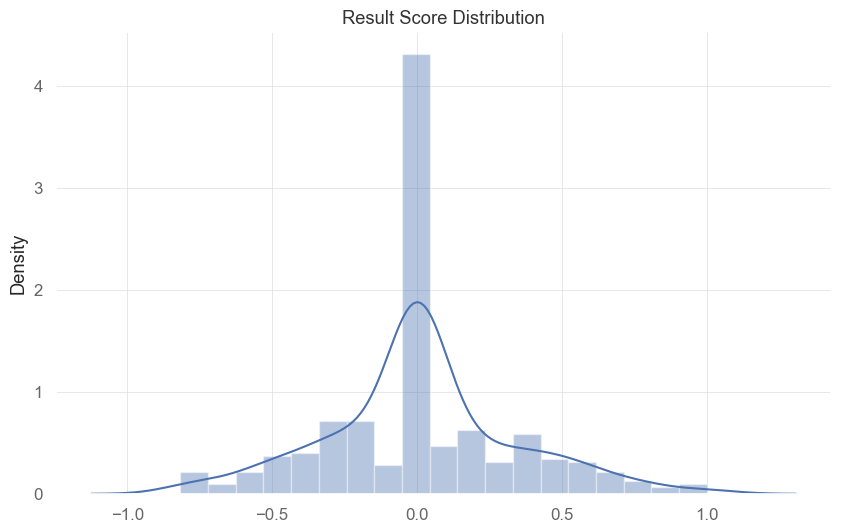

count    337.000000
mean       0.011326
std        0.327644
min       -0.816497
25%       -0.166667
50%        0.000000
75%        0.166667
max        1.000000
dtype: float64

<IPython.core.display.Javascript object>

In [65]:
plot_scores(scores)
pd.Series(scores).describe()

<AxesSubplot: xlabel='Date'>

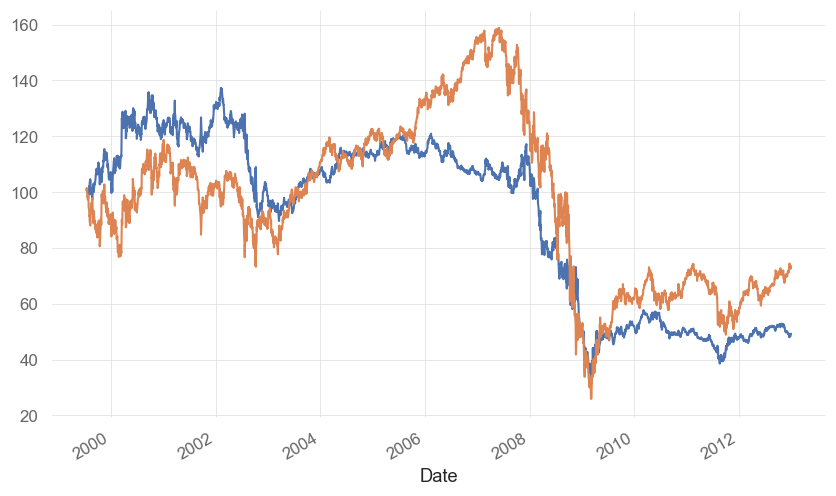

<IPython.core.display.Javascript object>

In [101]:
equity_curve.plot()
benchmark.plot()

                           Strategy    Benchmark
-------------------------  ----------  -----------
Start Period               1999-07-15  1999-07-15
End Period                 2012-12-31  2012-12-31
Risk-Free Rate             0.0%        0.0%
Time in Market             99.0%       99.0%

Cumulative Return          -50.98%     -27.2%
CAGR﹪                     -5.15%      -2.33%

Sharpe                     -0.11       0.1
Prob. Sharpe Ratio         34.81%      64.61%
Smart Sharpe               -0.1        0.1
Sortino                    -0.15       0.15
Smart Sortino              -0.14       0.14
Sortino/√2                 -0.11       0.11
Smart Sortino/√2           -0.1        0.1
Omega                      0.98        0.98

Max Drawdown               -77.15%     -83.71%
Longest DD Days            3979        2037
Volatility (ann.)          23.68%      34.39%
R^2                        0.01        0.01
Information Ratio          -0.01       -0.01
Calmar                     -0.07       -

None

Start      Valley         End  Days  Max Drawdown  99% Max Drawdown
1  2002-02-08  2009-03-06  2012-12-31  3979    -77.150686        -71.194368
2  2000-09-22  2001-09-05  2002-02-06   502    -16.959076        -16.419791
3  1999-11-17  2000-01-05  2000-03-15   119    -13.618550        -13.215479
4  2000-06-06  2000-07-28  2000-09-13    99     -8.740586         -8.429637
5  2000-04-13  2000-04-14  2000-06-05    53     -7.627953         -7.111512

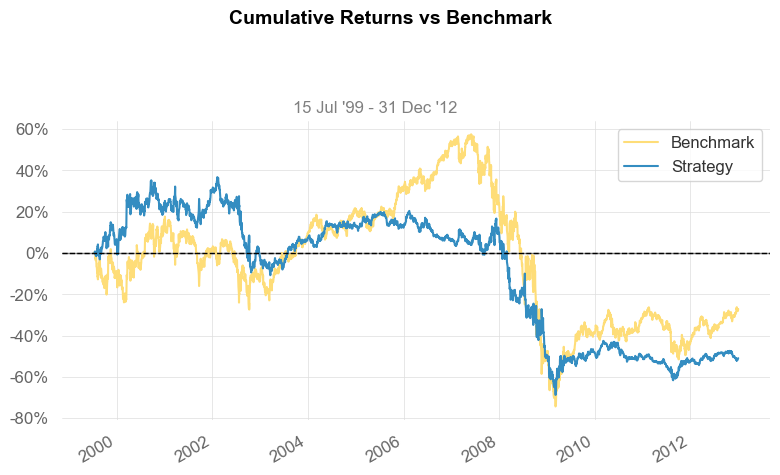

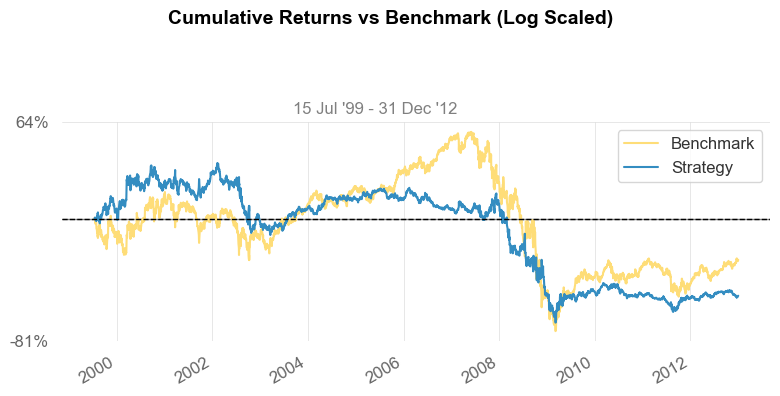

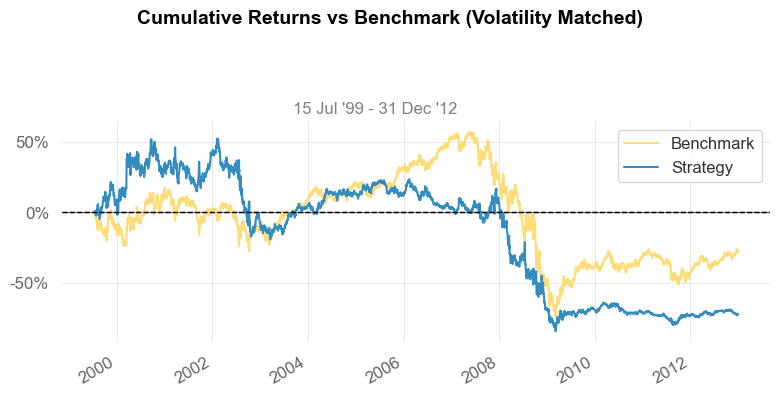

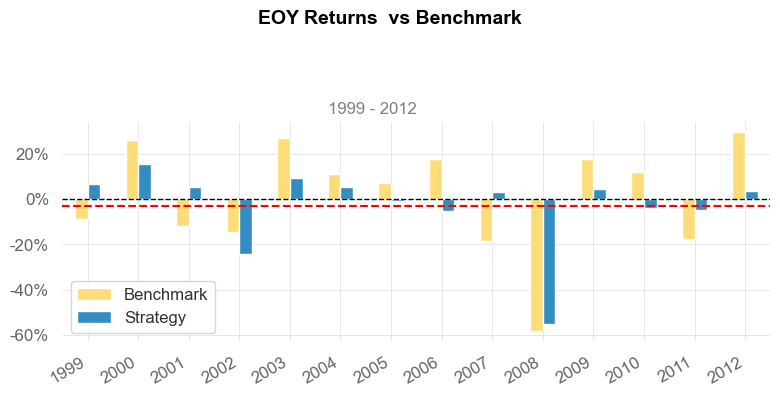

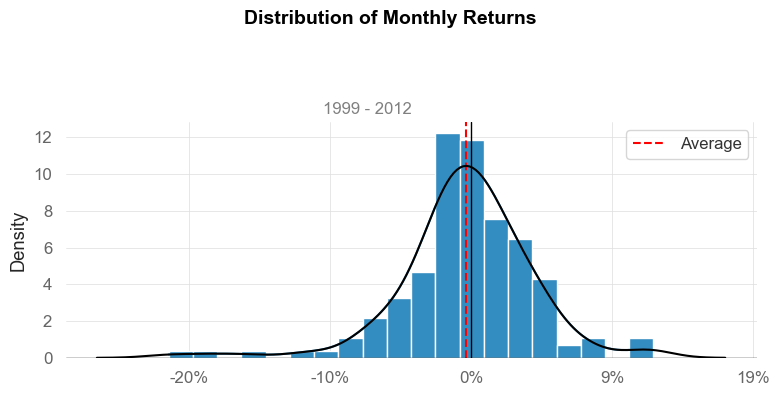

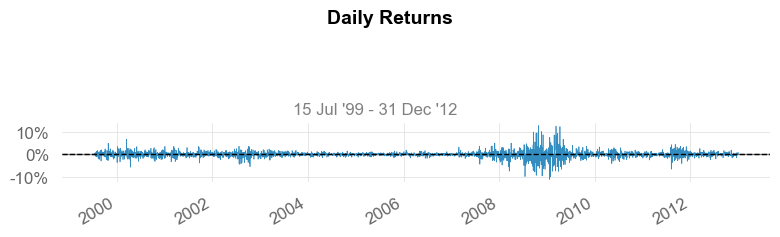

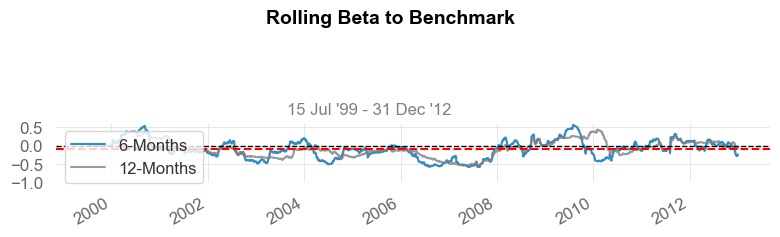

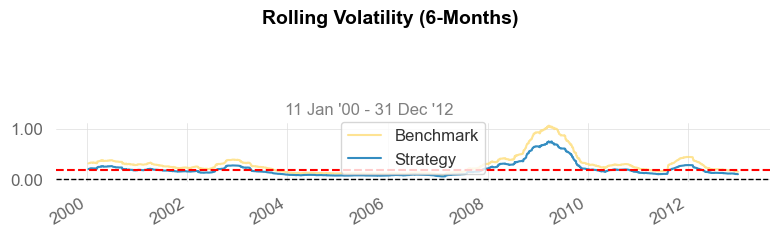

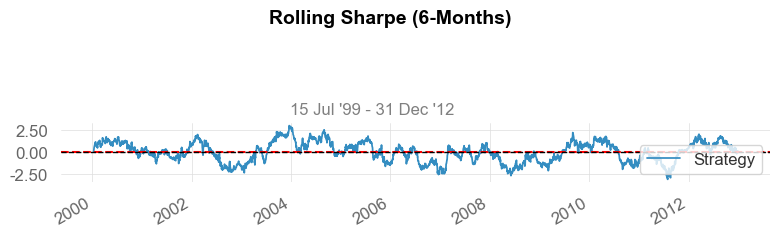

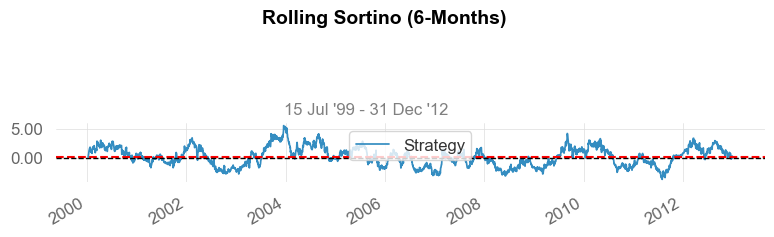

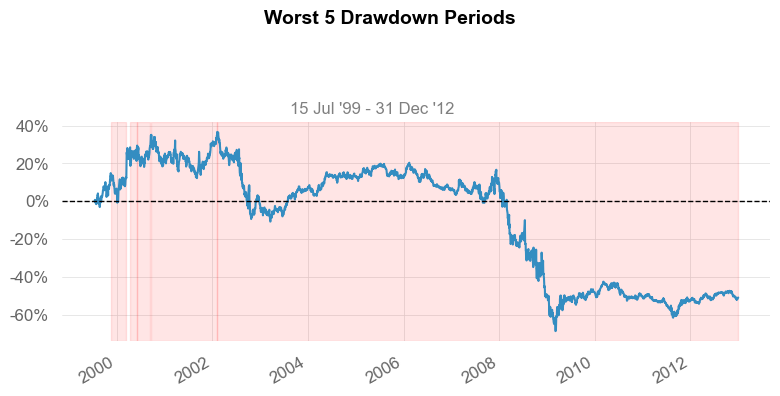

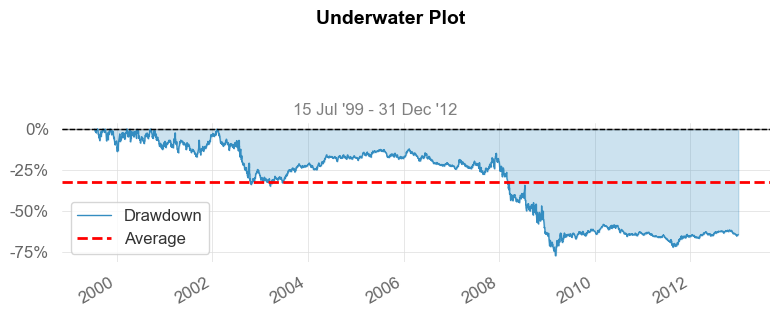

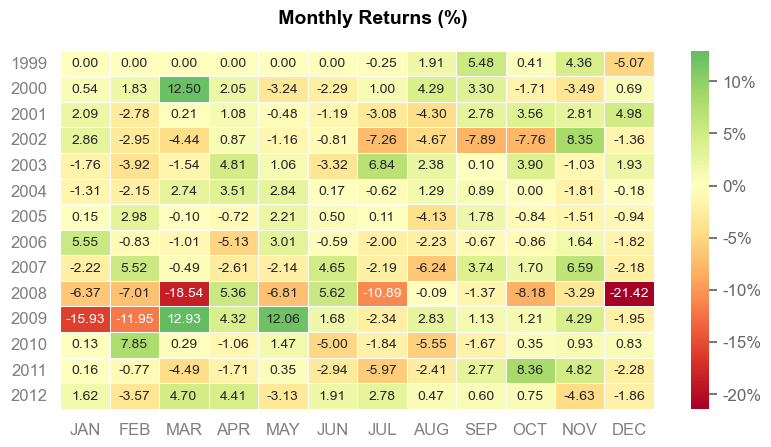

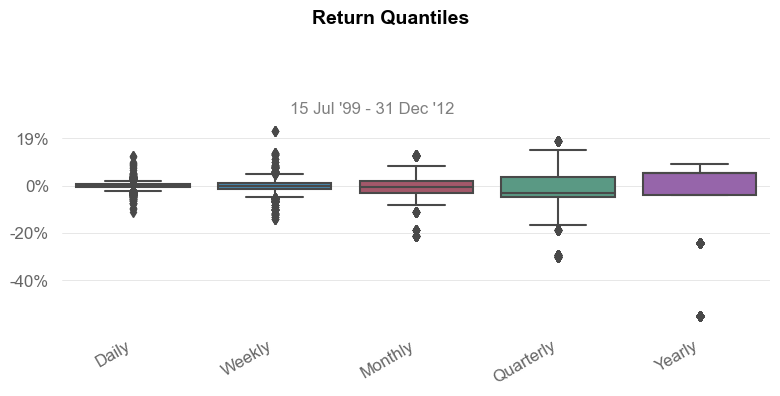

<IPython.core.display.Javascript object>

In [102]:
qs.reports.full(remove_timezone(equity_curve), remove_timezone(benchmark))

# Build a More Advanced Model

In this model we will add lots of technical analysis features

In [106]:
# Add all ta features
technical_features = (
    add_all_ta_features(
        df_train.copy(), open="open", high="high", low="low", close="close", volume="volume"
    )
    .ffill()
    .dropna()
)

<IPython.core.display.Javascript object>

In [107]:
cprint(technical_features)

-------------------------------------------------------------------------------
dataframe information
-------------------------------------------------------------------------------
                                open       high        low      close  \
Date                                                                    
2012-12-24 00:00:00-05:00  10.962362  11.022816  10.955645  10.995948   
2012-12-26 00:00:00-05:00  11.016099  11.036250  10.955645  10.995948   
2012-12-27 00:00:00-05:00  11.016101  11.036252  10.807869  10.955647   
2012-12-28 00:00:00-05:00  10.881760  10.955648  10.854891  10.868326   
2012-12-31 00:00:00-05:00  10.854891  11.022819  10.828023  11.009385   

                             volume  fwd_8    volume_adi  volume_obv  \
Date                                                                   
2012-12-24 00:00:00-05:00  29586100   -1.0  4.629729e+09 -1003934413   
2012-12-26 00:00:00-05:00  36545928   -1.0  4.629730e+09  -967388485   
2012-12-27 00:00:0

None
-------------------------------------------------------------------------------



<IPython.core.display.Javascript object>

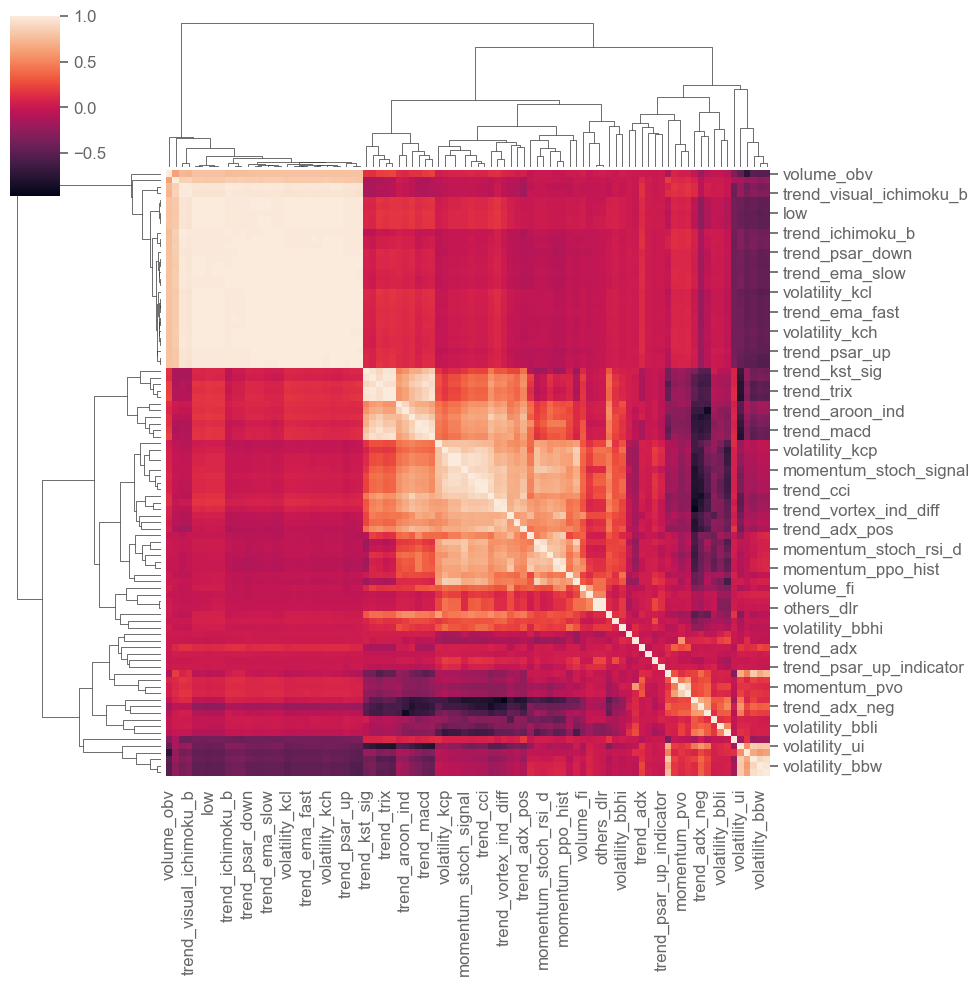

<IPython.core.display.Javascript object>

In [108]:
sns.clustermap(technical_features.corr())

In [109]:
drop_cols = ["open", "high", "low", "close", "volume"]
Xdf = technical_features.drop(drop_cols, axis=1)
cprint(Xdf)

-------------------------------------------------------------------------------
dataframe information
-------------------------------------------------------------------------------
                           fwd_8    volume_adi  volume_obv  volume_cmf  \
Date                                                                     
2012-12-24 00:00:00-05:00   -1.0  4.629729e+09 -1003934413    0.117884   
2012-12-26 00:00:00-05:00   -1.0  4.629730e+09  -967388485    0.162280   
2012-12-27 00:00:00-05:00   -1.0  4.645822e+09 -1022103481    0.132993   
2012-12-28 00:00:00-05:00   -1.0  4.616871e+09 -1061583867    0.102673   
2012-12-31 00:00:00-05:00   -1.0  4.680297e+09  -988009705    0.155540   

                              volume_fi  volume_em  volume_sma_em  \
Date                                                                
2012-12-24 00:00:00-05:00  1.906107e+06  -0.003050       0.007329   
2012-12-26 00:00:00-05:00  1.633806e+06   0.001482       0.005412   
2012-12-27 00:00:00-05:

None
-------------------------------------------------------------------------------



<IPython.core.display.Javascript object>

## make xy with new features

In [110]:
FEAT_COLS = [x for x in Xdf.columns if "fwd" not in x]
X, y = create_Xy(Xdf, FEAT_COLS, Y_TARGET_COL)
cprint(X)
cprint(y)

-------------------------------------------------------------------------------
dataframe information
-------------------------------------------------------------------------------
                             volume_adi  volume_obv  volume_cmf     volume_fi  \
Date                                                                            
2012-12-24 00:00:00-05:00  4.629729e+09 -1003934413    0.117884  1.906107e+06   
2012-12-26 00:00:00-05:00  4.629730e+09  -967388485    0.162280  1.633806e+06   
2012-12-27 00:00:00-05:00  4.645822e+09 -1022103481    0.132993  1.085393e+06   
2012-12-28 00:00:00-05:00  4.616871e+09 -1061583867    0.102673  4.378451e+05   
2012-12-31 00:00:00-05:00  4.680297e+09  -988009705    0.155540  1.857909e+06   

                           volume_em  volume_sma_em     volume_vpt  \
Date                                                                 
2012-12-24 00:00:00-05:00  -0.003050       0.007329 -908161.601934   
2012-12-26 00:00:00-05:00   0.001482    

None
-------------------------------------------------------------------------------

-------------------------------------------------------------------------------
dataframe information
-------------------------------------------------------------------------------
                           fwd_8
Date                            
2012-12-24 00:00:00-05:00   -1.0
2012-12-26 00:00:00-05:00   -1.0
2012-12-27 00:00:00-05:00   -1.0
2012-12-28 00:00:00-05:00   -1.0
2012-12-31 00:00:00-05:00   -1.0
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3438 entries, 1999-04-07 00:00:00-04:00 to 2012-12-31 00:00:00-05:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   fwd_8   3438 non-null   float64
dtypes: float64(1)
memory usage: 53.7 KB
None
-------------------------------------------------------------------------------



<IPython.core.display.Javascript object>

## run walkforward test

In [111]:
# walkforward test
scores, predictions = walkforward_with_purging_and_embargos(
    model=create_model(),
    X=X,
    y=y,
    purged_window_size=0,
    embargo_period=2,
    lookback=100,
    test_size=10,
    scaler=StandardScaler(),
    scorer=matthews_corrcoef,
)

<IPython.core.display.Javascript object>

## evaluate results

In [112]:
# evaluate results
STARTING_VALUE = 100
equity_curve, equity_returns = get_estimated_backtests(
    predictions, actual_returns, starting_value=STARTING_VALUE
)
benchmark = returns_to_index(
    actual_returns.loc[equity_curve.index], starting_value=STARTING_VALUE
)

<IPython.core.display.Javascript object>

In [113]:
update_agg_results(hdf_store_fp, "ta_model", scores, equity_curve, equity_returns)

<IPython.core.display.Javascript object>

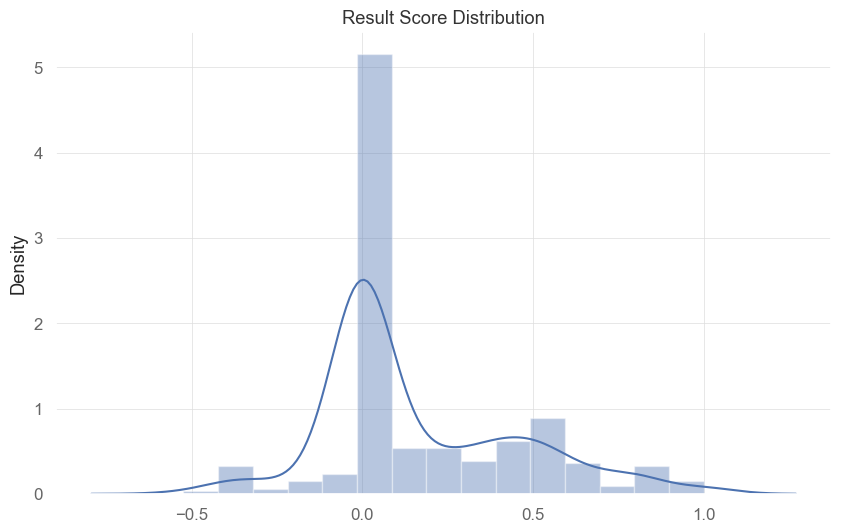

<AxesSubplot: xlabel='Date'>

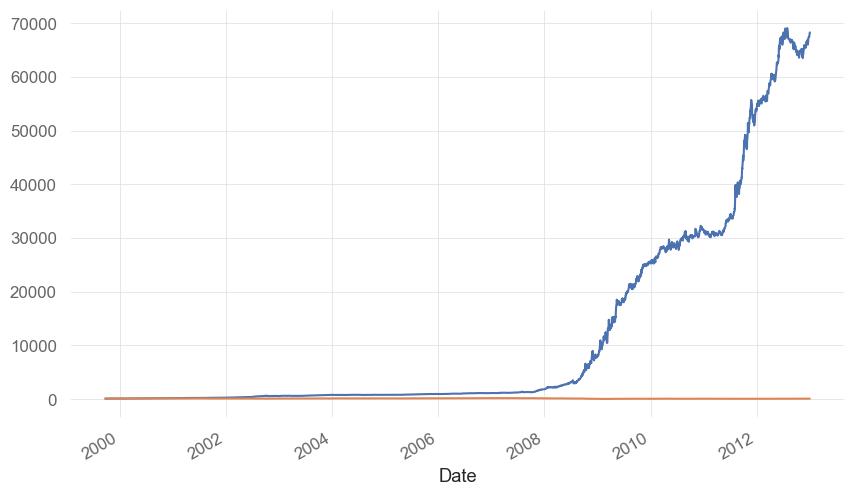

<IPython.core.display.Javascript object>

In [114]:
plot_scores(scores)
pd.Series(scores).describe()

equity_curve.plot()
benchmark.plot()

                           Strategy     Benchmark
-------------------------  -----------  -----------
Start Period               1999-09-24   1999-09-24
End Period                 2012-12-31   2012-12-31
Risk-Free Rate             0.0%         0.0%
Time in Market             99.0%        99.0%

Cumulative Return          67,771.85%   -14.46%
CAGR﹪                     63.39%       -1.17%

Sharpe                     2.4          0.14
Prob. Sharpe Ratio         100.0%       69.15%
Smart Sharpe               2.32         0.13
Sortino                    4.04         0.2
Smart Sortino              3.9          0.19
Sortino/√2                 2.86         0.14
Smart Sortino/√2           2.76         0.14
Omega                      1.65         1.65

Max Drawdown               -19.8%       -83.71%
Longest DD Days            170          2037
Volatility (ann.)          21.59%       34.49%
R^2                        0.06         0.06
Information Ratio          0.07         0.07
Calmar           

None

Start      Valley         End  Days  Max Drawdown  99% Max Drawdown
1  2008-12-01  2008-12-08  2009-01-14    44    -19.795989        -17.988921
2  2008-10-10  2008-10-14  2008-11-10    31    -18.120406        -13.783061
3  2008-07-16  2008-07-22  2008-08-20    35    -16.606766        -16.547804
4  2009-02-27  2009-03-06  2009-03-12    13    -16.065036        -15.488098
5  2009-01-21  2009-01-28  2009-02-10    20    -15.335058        -11.410586

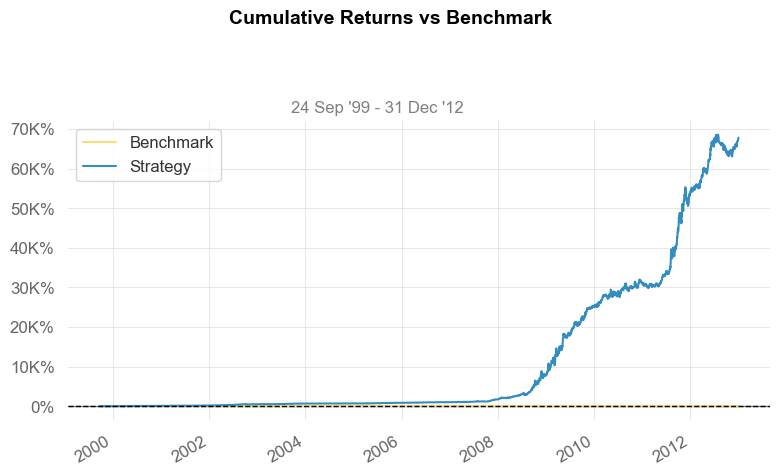

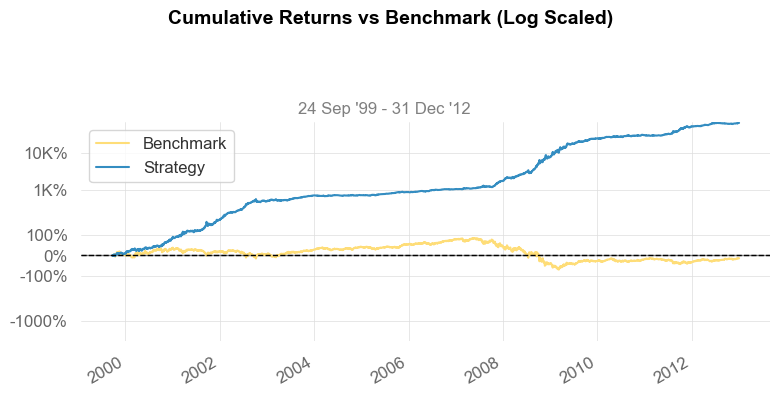

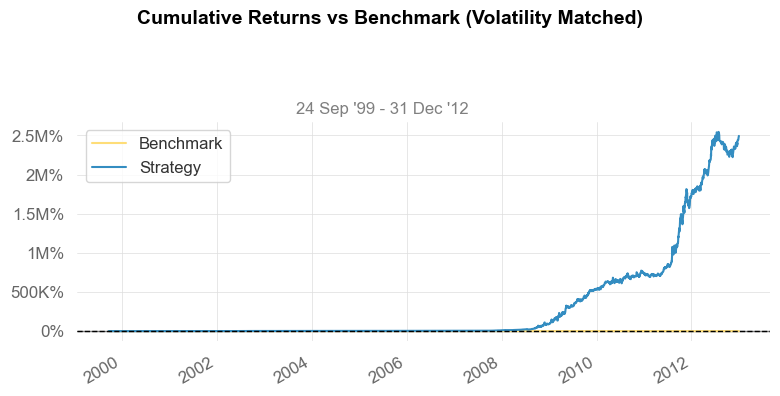

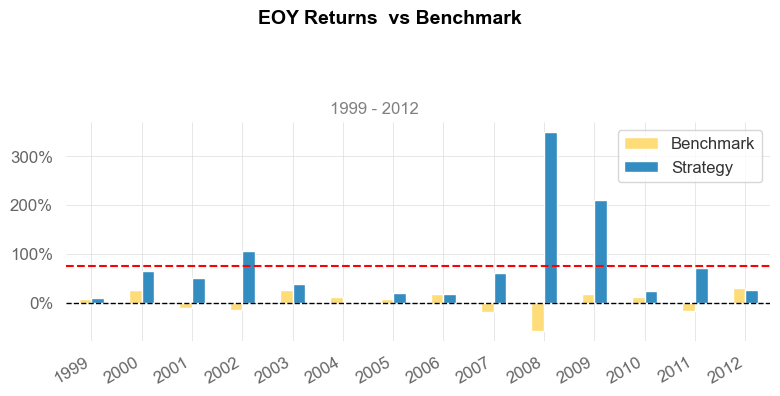

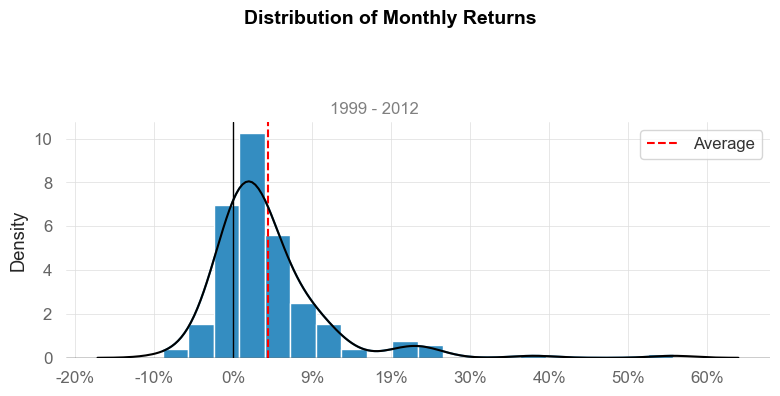

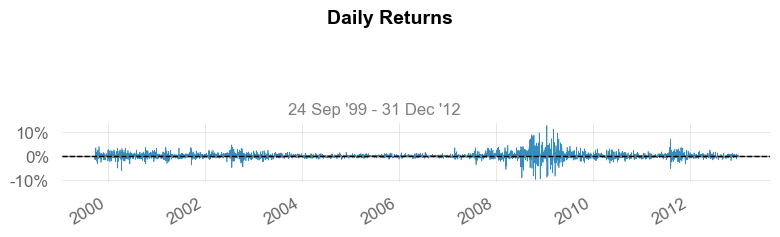

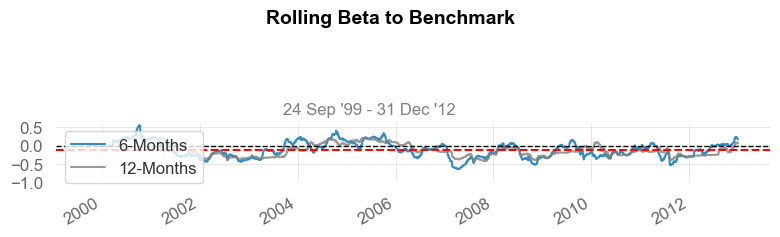

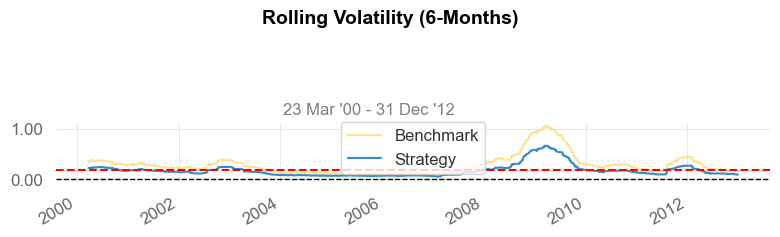

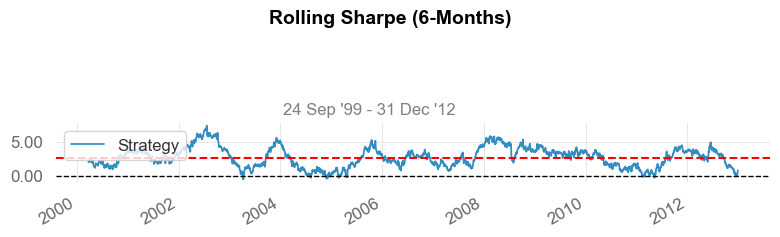

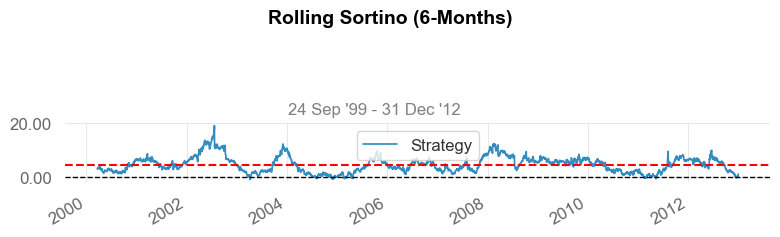

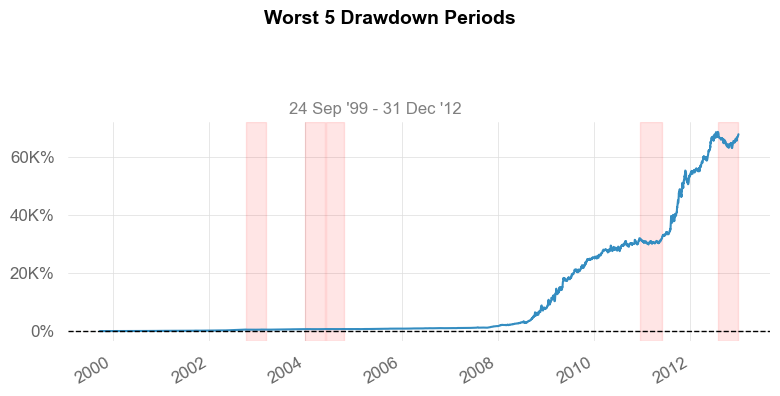

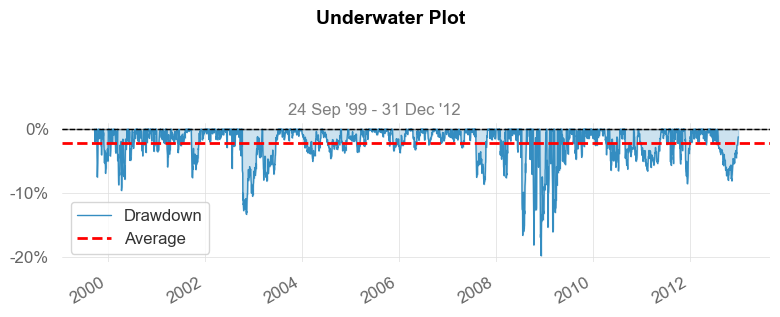

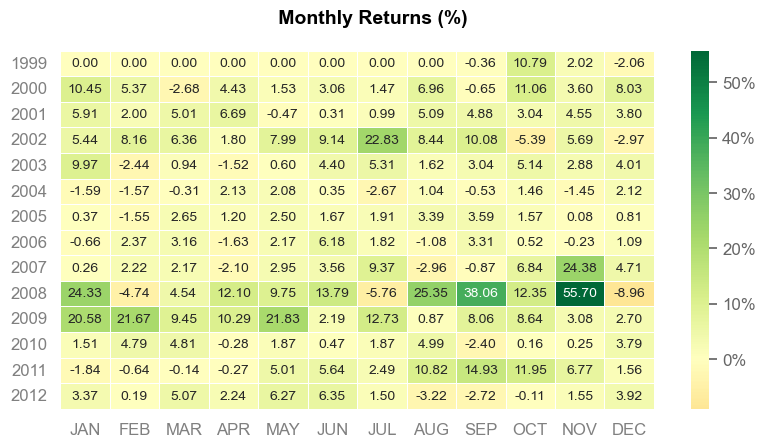

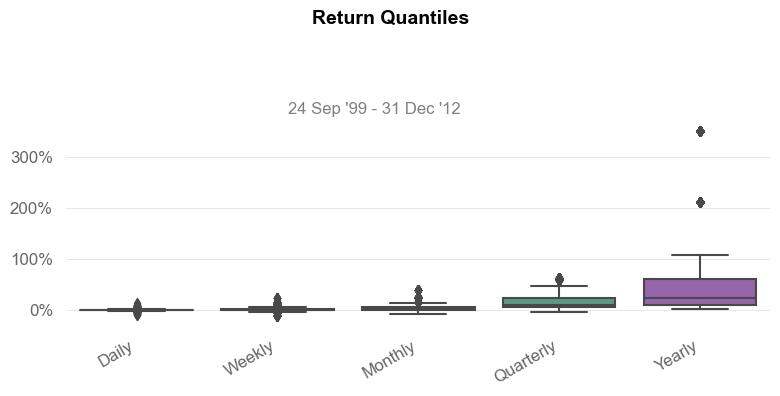

<IPython.core.display.Javascript object>

In [115]:
qs.reports.full(remove_timezone(equity_curve), remove_timezone(benchmark))

# Build a Model With Market Marketstructure features

In [142]:
def add_market_microstructure_features(indf, window):
    out_df = indf.copy()

    # add acf feature
    out_df["acf"] = (
        out_df["close"]
        .rolling(window)
        .apply(lambda x: acf(x, adjusted=True, fft=False)[1], raw=True)
    )
    # timeseries topographical
    out_df["permutation_entropy"] = (
        out_df["close"]
        .rolling(window)
        .apply(lambda x: permutation_entropy(x, 3), raw=True)
    )
    out_df["hurst"] = (
        out_df["close"].rolling(window).apply(lambda x: hurst(x), raw=True)
    )

    out_df["kyles_lambda"] = kyles_lambda(
        out_df["close"], out_df["volume"], window=window
    )
    out_df["bekker_parkinson_vol"] = bekker_parkinson_vol(
        out_df["high"], out_df["low"], out_df["close"], window=window
    )

    out_df["corwin_schultz_hl"] = corwin_schultz_hl(
        out_df["high"], out_df["low"], out_df["volume"], window=window
    )

    out_df["amihuds_lambda"] = amihuds_lambda(
        out_df["close"], out_df["volume"], window=window
    )

    out_df["hb_lambda"] = hasbroucks_lambda(
        out_df["close"], out_df["volume"], window=window
    )

    out_df["roll_measure"] = roll_measure(out_df["close"], window=window)
    return out_df.ffill().dropna()

<IPython.core.display.Javascript object>

## add features

In [146]:
drop_cols = ["open", "high", "low", "close", "volume"]
Xdf = add_market_microstructure_features(df_train, window=WINDOW).drop(
    drop_cols, axis=1
)
cprint(Xdf)

-------------------------------------------------------------------------------
dataframe information
-------------------------------------------------------------------------------
                           fwd_8       acf  permutation_entropy     hurst  \
Date                                                                        
2012-12-24 00:00:00-05:00   -1.0  0.916561             1.885817 -1.143456   
2012-12-26 00:00:00-05:00   -1.0  0.913987             1.892789 -1.152217   
2012-12-27 00:00:00-05:00   -1.0  0.889980             1.892789 -1.138575   
2012-12-28 00:00:00-05:00   -1.0  0.883467             1.885817 -1.111761   
2012-12-31 00:00:00-05:00   -1.0  0.856603             1.864829 -1.116083   

                           kyles_lambda  bekker_parkinson_vol  \
Date                                                            
2012-12-24 00:00:00-05:00      0.635427              0.156461   
2012-12-26 00:00:00-05:00      0.622203              0.156461   
2012-12-27 00:00:0

<IPython.core.display.Javascript object>

In [147]:
FEAT_COLS = [x for x in Xdf.columns if "fwd" not in x]
X, y = create_Xy(Xdf, FEAT_COLS, Y_TARGET_COL)
cprint(X)
cprint(y)

-------------------------------------------------------------------------------
dataframe information
-------------------------------------------------------------------------------
                                acf  permutation_entropy     hurst  \
Date                                                                 
2012-12-24 00:00:00-05:00  0.916561             1.885817 -1.143456   
2012-12-26 00:00:00-05:00  0.913987             1.892789 -1.152217   
2012-12-27 00:00:00-05:00  0.889980             1.892789 -1.138575   
2012-12-28 00:00:00-05:00  0.883467             1.885817 -1.111761   
2012-12-31 00:00:00-05:00  0.856603             1.864829 -1.116083   

                           kyles_lambda  bekker_parkinson_vol  \
Date                                                            
2012-12-24 00:00:00-05:00      0.635427              0.156461   
2012-12-26 00:00:00-05:00      0.622203              0.156461   
2012-12-27 00:00:00-05:00      0.629403              0.156466   
20

<IPython.core.display.Javascript object>

## run walkforward test

In [148]:
scores, predictions = walkforward_with_purging_and_embargos(
    model=create_model(),
    X=X,
    y=y,
    purged_window_size=0,
    embargo_period=2,
    lookback=100,
    test_size=10,
    scaler=StandardScaler(),
    scorer=matthews_corrcoef,
)

<IPython.core.display.Javascript object>

## evaluate results

In [149]:
# evaluate results
STARTING_VALUE = 100
equity_curve, equity_returns = get_estimated_backtests(
    predictions, actual_returns, starting_value=STARTING_VALUE
)
benchmark = returns_to_index(
    actual_returns.loc[equity_curve.index], starting_value=STARTING_VALUE
)

<IPython.core.display.Javascript object>

In [150]:
update_agg_results(
    hdf_store_fp, "microstructure_model", scores, equity_curve, equity_returns
)

<IPython.core.display.Javascript object>

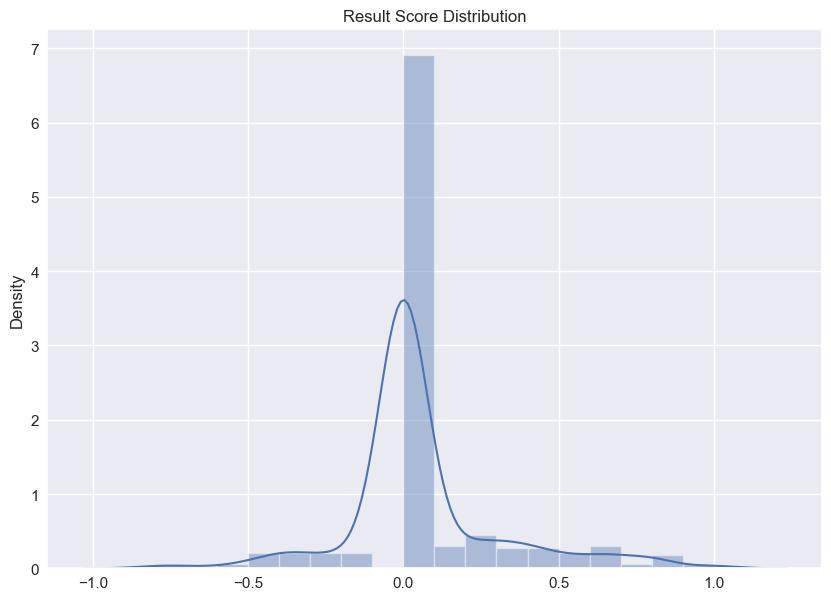

<AxesSubplot: xlabel='Date'>

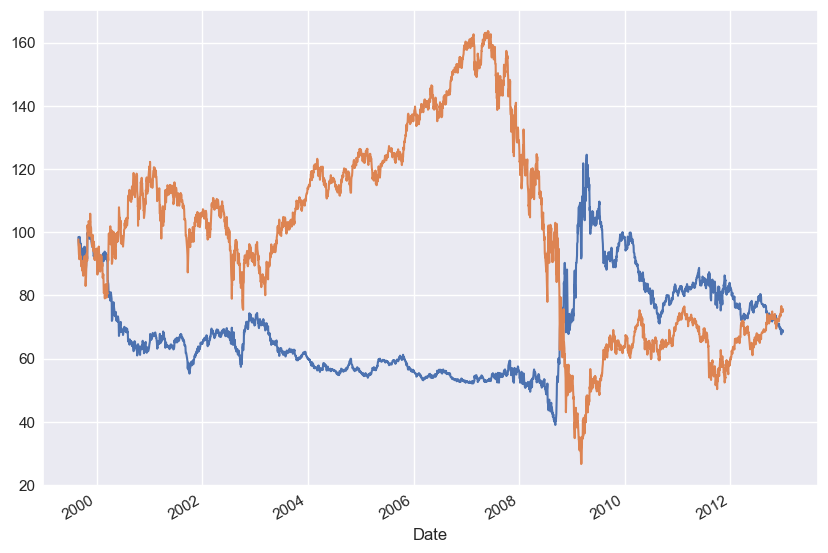

<IPython.core.display.Javascript object>

In [151]:
plot_scores(scores)
pd.Series(scores).describe()

equity_curve.plot()
benchmark.plot()

                           Strategy    Benchmark
-------------------------  ----------  -----------
Start Period               1999-08-26  1999-08-26
End Period                 2012-12-31  2012-12-31
Risk-Free Rate             0.0%        0.0%
Time in Market             99.0%       99.0%

Cumulative Return          -30.49%     -22.55%
CAGR﹪                     -2.69%      -1.89%

Sharpe                     -0.01       0.12
Prob. Sharpe Ratio         48.35%      66.36%
Smart Sharpe               -0.01       0.11
Sortino                    -0.02       0.17
Smart Sortino              -0.02       0.17
Sortino/√2                 -0.01       0.12
Smart Sortino/√2           -0.01       0.12
Omega                      1.0         1.0

Max Drawdown               -61.7%      -83.71%
Longest DD Days            3373        2037
Volatility (ann.)          22.34%      34.46%
R^2                        0.0         0.0
Information Ratio          -0.01       -0.01
Calmar                     -0.04      

None

Start      Valley         End  Days  Max Drawdown  99% Max Drawdown
1  1999-11-17  2008-09-08  2009-02-10  3373    -61.698487        -57.117261
2  2009-04-14  2012-12-20  2012-12-31  1357    -45.628061        -44.278271
3  2009-02-27  2009-03-06  2009-03-12    13    -16.114007        -15.570101
4  2009-03-23  2009-03-30  2009-04-13    21    -14.793200        -11.976795
5  1999-09-07  1999-10-18  1999-10-28    51    -10.106731         -9.104802

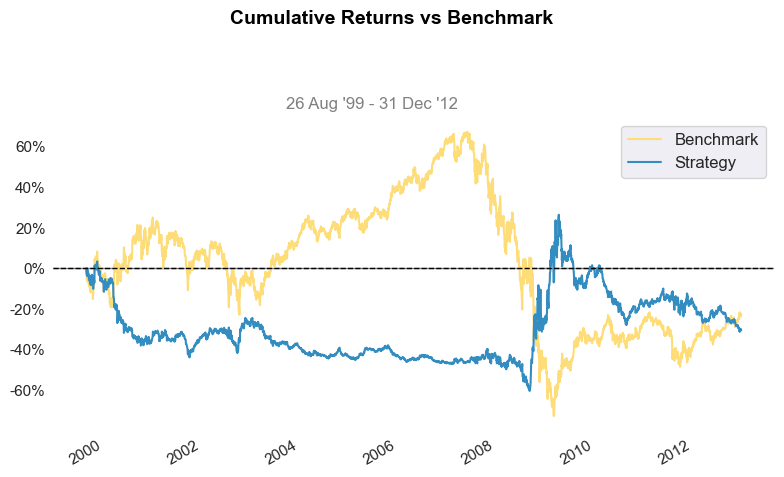

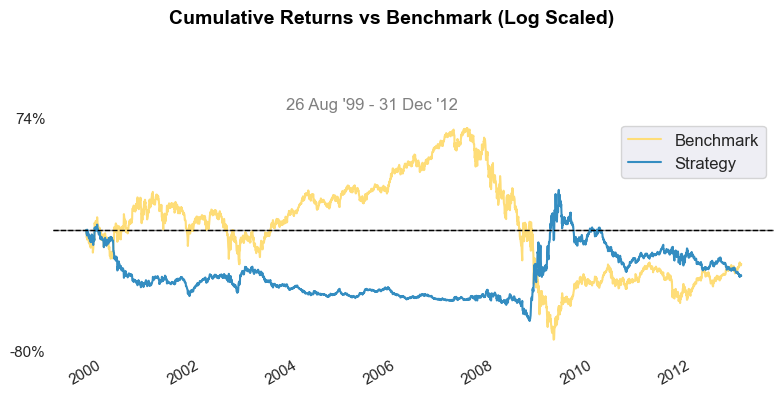

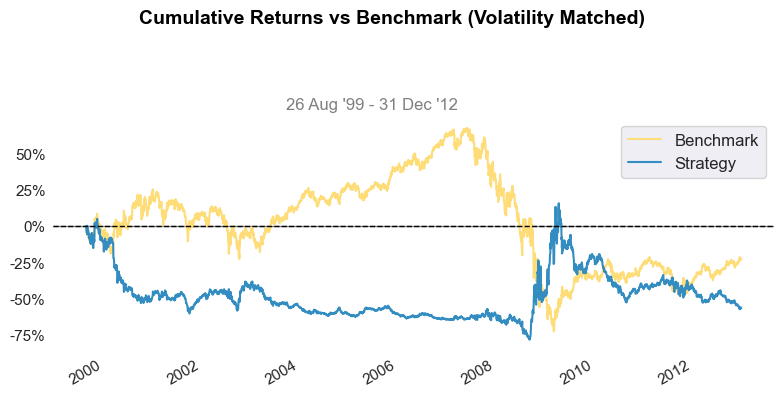

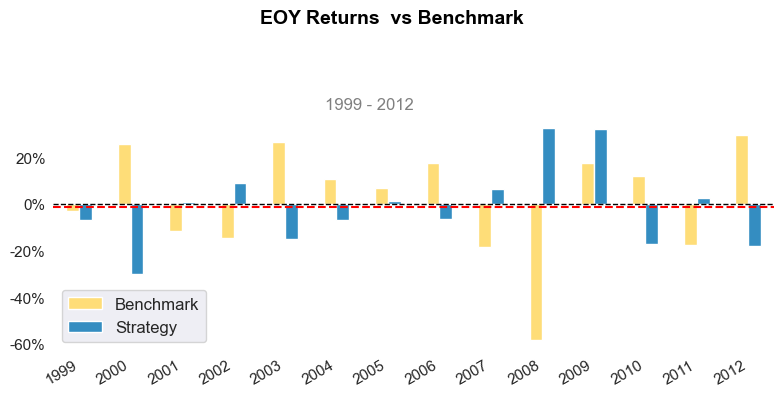

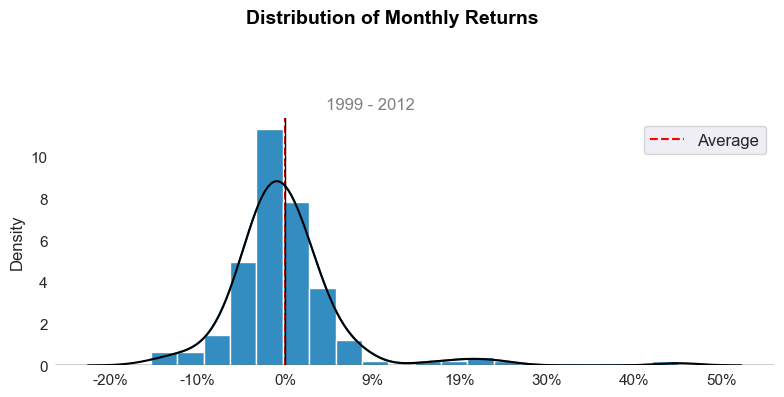

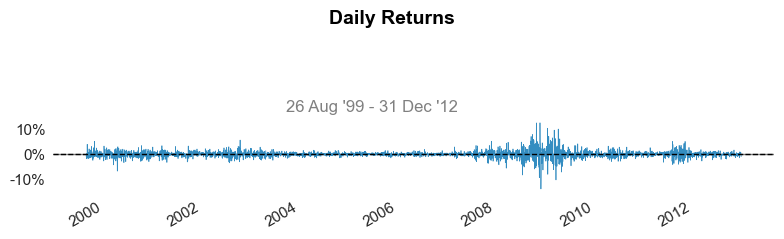

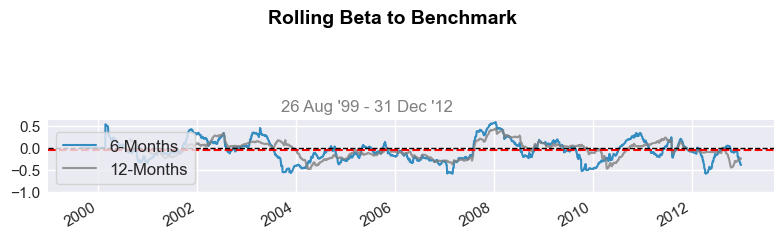

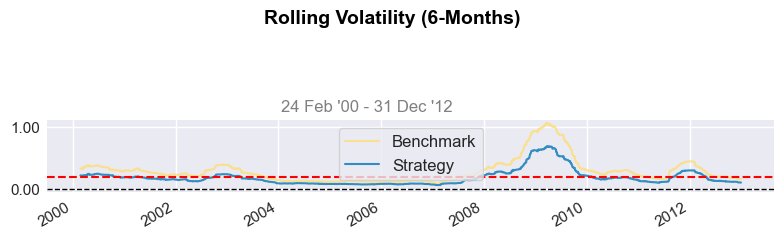

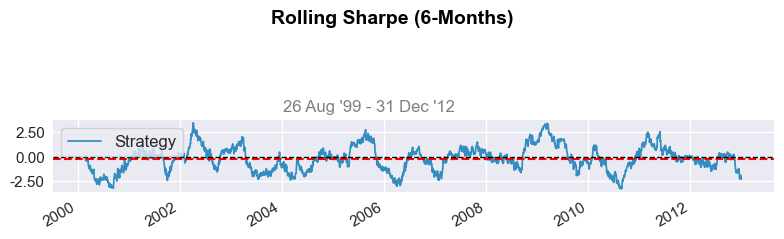

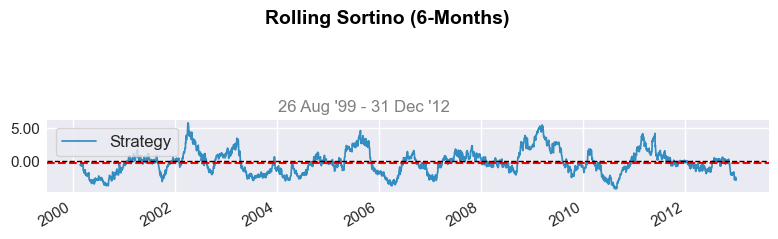

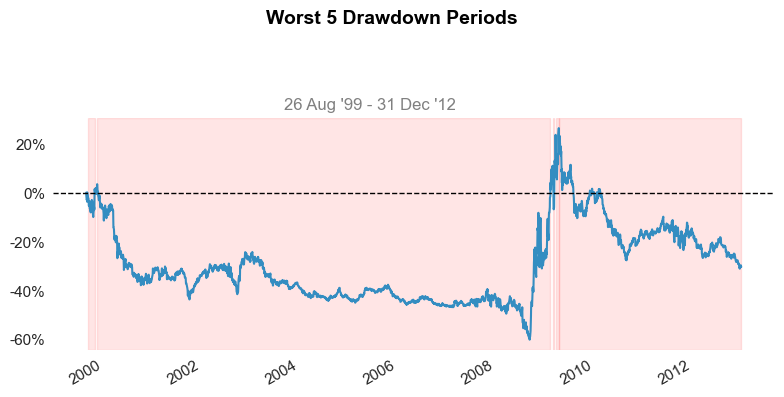

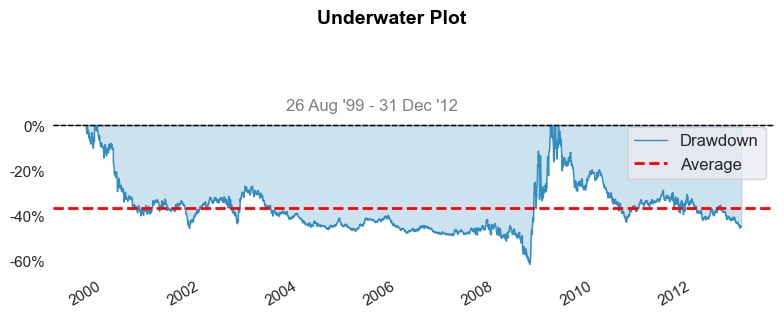

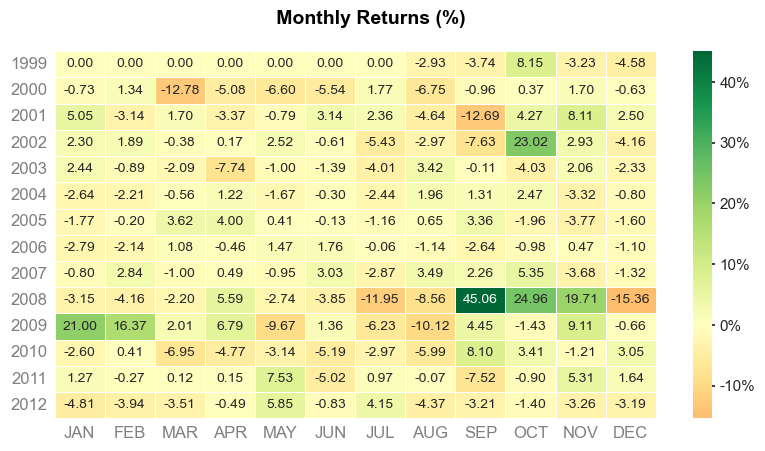

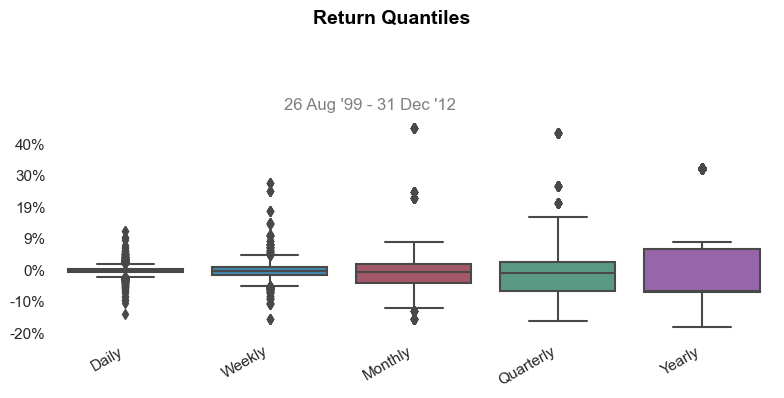

<IPython.core.display.Javascript object>

In [152]:
qs.reports.full(remove_timezone(equity_curve), remove_timezone(benchmark))

# Feature Select for Technical Analysis Features

In [154]:
drop_cols = ["open", "high", "low", "close", "volume"]
Xdf = technical_features.drop(drop_cols, axis=1)
cprint(Xdf)

-------------------------------------------------------------------------------
dataframe information
-------------------------------------------------------------------------------
                           fwd_8    volume_adi  volume_obv  volume_cmf  \
Date                                                                     
2012-12-24 00:00:00-05:00   -1.0  4.629729e+09 -1003934413    0.117884   
2012-12-26 00:00:00-05:00   -1.0  4.629730e+09  -967388485    0.162280   
2012-12-27 00:00:00-05:00   -1.0  4.645822e+09 -1022103481    0.132993   
2012-12-28 00:00:00-05:00   -1.0  4.616871e+09 -1061583867    0.102673   
2012-12-31 00:00:00-05:00   -1.0  4.680297e+09  -988009705    0.155540   

                              volume_fi  volume_em  volume_sma_em  \
Date                                                                
2012-12-24 00:00:00-05:00  1.906107e+06  -0.003050       0.007329   
2012-12-26 00:00:00-05:00  1.633806e+06   0.001482       0.005412   
2012-12-27 00:00:00-05:

None
-------------------------------------------------------------------------------



<IPython.core.display.Javascript object>

In [155]:
FEAT_COLS = [x for x in Xdf.columns if "fwd" not in x]
X, y = create_Xy(Xdf, FEAT_COLS, Y_TARGET_COL)

cprint(X)
cprint(y)

-------------------------------------------------------------------------------
dataframe information
-------------------------------------------------------------------------------
                             volume_adi  volume_obv  volume_cmf     volume_fi  \
Date                                                                            
2012-12-24 00:00:00-05:00  4.629729e+09 -1003934413    0.117884  1.906107e+06   
2012-12-26 00:00:00-05:00  4.629730e+09  -967388485    0.162280  1.633806e+06   
2012-12-27 00:00:00-05:00  4.645822e+09 -1022103481    0.132993  1.085393e+06   
2012-12-28 00:00:00-05:00  4.616871e+09 -1061583867    0.102673  4.378451e+05   
2012-12-31 00:00:00-05:00  4.680297e+09  -988009705    0.155540  1.857909e+06   

                           volume_em  volume_sma_em     volume_vpt  \
Date                                                                 
2012-12-24 00:00:00-05:00  -0.003050       0.007329 -908161.601934   
2012-12-26 00:00:00-05:00   0.001482    

None
-------------------------------------------------------------------------------

-------------------------------------------------------------------------------
dataframe information
-------------------------------------------------------------------------------
                           fwd_8
Date                            
2012-12-24 00:00:00-05:00   -1.0
2012-12-26 00:00:00-05:00   -1.0
2012-12-27 00:00:00-05:00   -1.0
2012-12-28 00:00:00-05:00   -1.0
2012-12-31 00:00:00-05:00   -1.0
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3438 entries, 1999-04-07 00:00:00-04:00 to 2012-12-31 00:00:00-05:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   fwd_8   3438 non-null   float64
dtypes: float64(1)
memory usage: 53.7 KB
None
-------------------------------------------------------------------------------



<IPython.core.display.Javascript object>

In [169]:
# normalize


def roll_zscore(x, window):
    r = x.rolling(window=window)
    m = r.mean().shift(1)
    s = r.std(ddof=0).shift(1)
    z = (x - m) / s
    return z


X_scaled = roll_zscore(X, window=WINDOW)
X_scaled = X_scaled[np.isfinite(X_scaled)].dropna()
cprint(X_scaled)

# match index
y = y.loc[X_scaled.index]
cprint(y)

-------------------------------------------------------------------------------
dataframe information
-------------------------------------------------------------------------------
                           volume_adi  volume_obv  volume_cmf  volume_fi  \
Date                                                                       
2012-12-24 00:00:00-05:00    2.002309    0.785956    1.047794   0.851675   
2012-12-26 00:00:00-05:00    1.816276    1.062891    1.370087   0.701859   
2012-12-27 00:00:00-05:00    1.847978    0.495646    1.029124   0.433524   
2012-12-28 00:00:00-05:00    1.375315    0.056483    0.715011   0.102812   
2012-12-31 00:00:00-05:00    2.069999    0.812061    1.111791   0.716965   

                           volume_em  volume_sma_em  volume_vpt  volume_vwap  \
Date                                                                           
2012-12-24 00:00:00-05:00  -0.315514       1.496940   -1.274805     2.557663   
2012-12-26 00:00:00-05:00  -0.080082       0.

None
-------------------------------------------------------------------------------

-------------------------------------------------------------------------------
dataframe information
-------------------------------------------------------------------------------
                           fwd_8
Date                            
2012-12-24 00:00:00-05:00   -1.0
2012-12-26 00:00:00-05:00   -1.0
2012-12-27 00:00:00-05:00   -1.0
2012-12-28 00:00:00-05:00   -1.0
2012-12-31 00:00:00-05:00   -1.0
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3372 entries, 1999-05-25 00:00:00-04:00 to 2012-12-31 00:00:00-05:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   fwd_8   3372 non-null   float64
dtypes: float64(1)
memory usage: 52.7 KB
None
-------------------------------------------------------------------------------



<IPython.core.display.Javascript object>

In [153]:
from BorutaShap import BorutaShap

<IPython.core.display.Javascript object>

In [171]:
# no model selected default is Random Forest, if classification is False it is a Regression problem
Feature_Selector = BorutaShap(importance_measure="shap", classification=True)

Feature_Selector.fit(X=X_scaled, y=y.values, n_trials=25, random_state=0)

  0%|          | 0/25 [00:00<?, ?it/s]

3 attributes confirmed important: ['momentum_pvo_hist', 'volume_cmf', 'momentum_ao']
70 attributes confirmed unimportant: ['momentum_kama', 'trend_ichimoku_b', 'volatility_kcli', 'trend_adx', 'momentum_pvo_signal', 'trend_aroon_ind', 'trend_aroon_down', 'volatility_bbm', 'trend_visual_ichimoku_b', 'momentum_stoch_rsi_k', 'trend_sma_slow', 'others_cr', 'momentum_uo', 'trend_psar_up', 'trend_psar_down_indicator', 'trend_vortex_ind_diff', 'trend_macd_diff', 'volatility_dcm', 'momentum_ppo', 'momentum_rsi', 'others_dlr', 'volatility_kcl', 'volatility_dcw', 'trend_macd_signal', 'trend_dpo', 'trend_psar_up_indicator', 'trend_visual_ichimoku_a', 'volatility_bbhi', 'momentum_roc', 'volume_vpt', 'trend_macd', 'others_dr', 'trend_mass_index', 'momentum_stoch_signal', 'trend_ichimoku_a', 'volatility_bbli', 'trend_vortex_ind_pos', 'volume_fi', 'volatility_kcc', 'trend_sma_fast', 'momentum_pvo', 'volatility_kch', 'volatility_kcw', 'momentum_stoch_rsi', 'volatility_dcp', 'trend_adx_neg', 'momentum_s

<IPython.core.display.Javascript object>

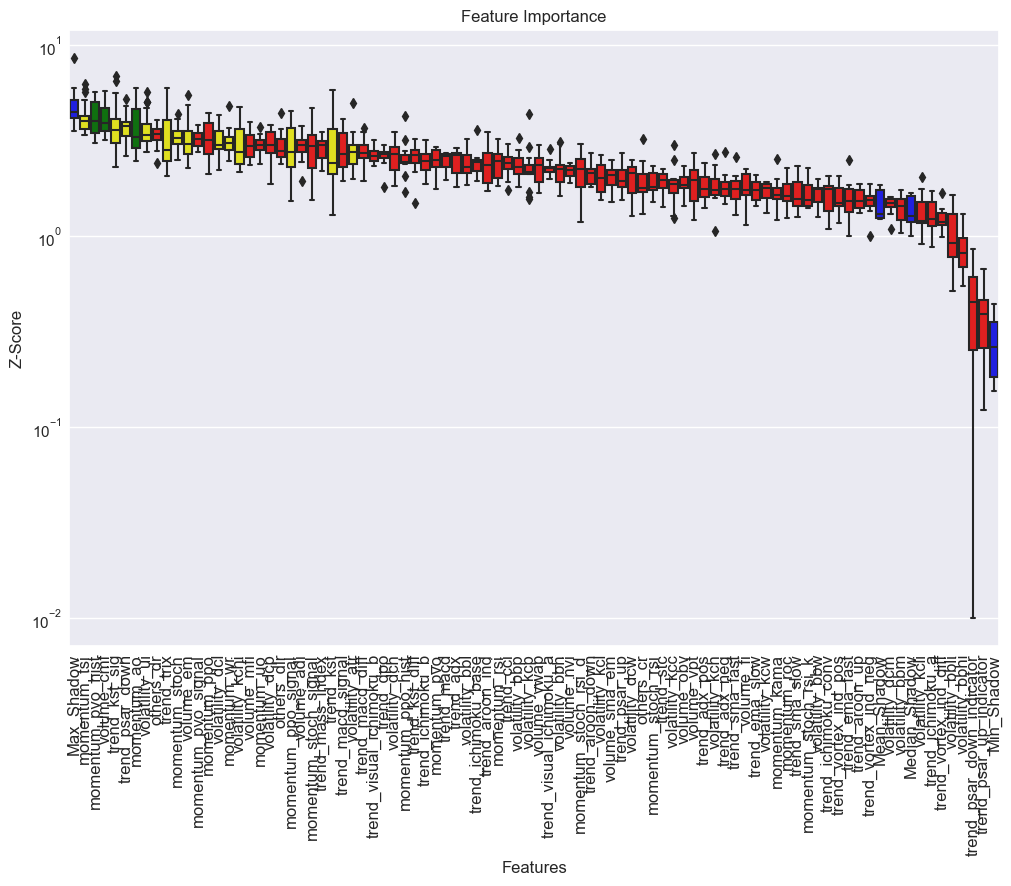

<IPython.core.display.Javascript object>

In [172]:
Feature_Selector.plot(X_size=12, figsize=(12, 8), y_scale="log", which_features="all")

In [173]:
Feature_Selector.TentativeRoughFix()

0 tentative features are now accepted: []
13 tentative features are now rejected: ['volatility_atr' 'momentum_stoch' 'trend_kst_sig' 'trend_kst' 'volume_em'
 'trend_trix' 'volatility_kchi' 'volatility_dcl' 'momentum_wr'
 'volatility_ui' 'momentum_tsi' 'trend_psar_down' 'momentum_ppo_signal']


<IPython.core.display.Javascript object>

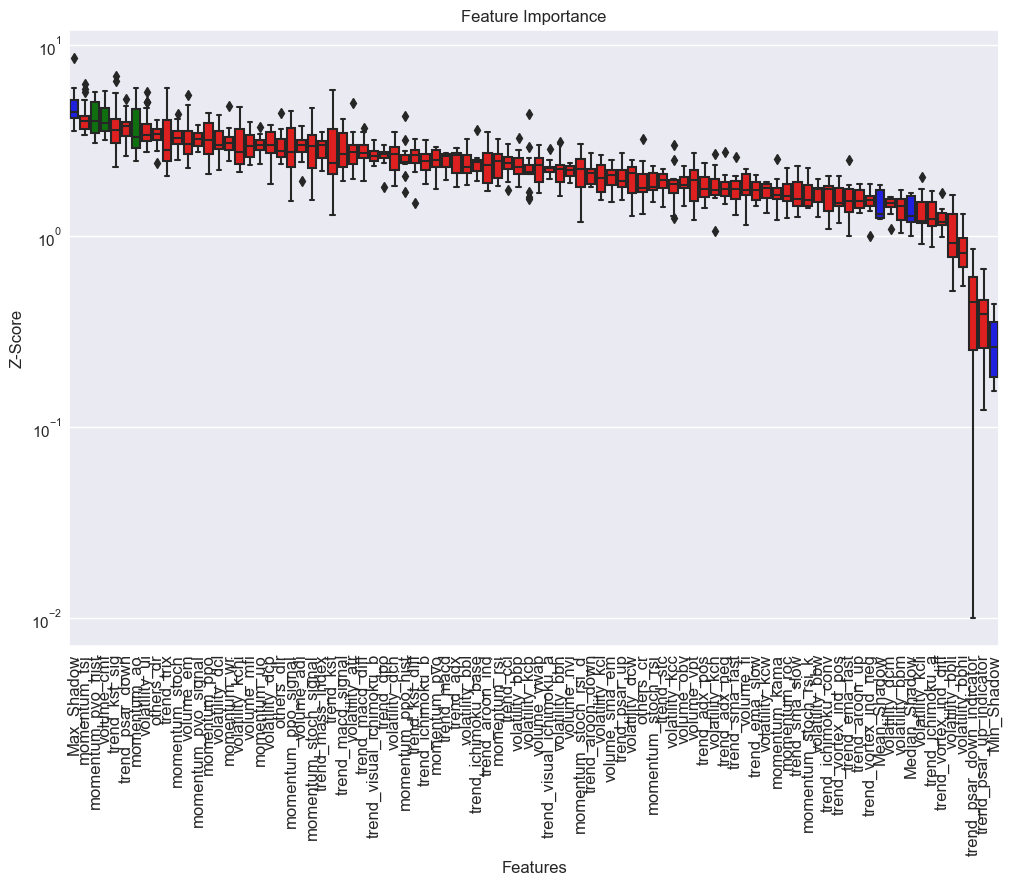

<IPython.core.display.Javascript object>

In [174]:
Feature_Selector.plot(X_size=12, figsize=(12, 8), y_scale="log", which_features="all")

In [188]:
Feature_Selector.results_to_csv(filename="borutashap_feature_importance")

<IPython.core.display.Javascript object>

In [189]:
Feature_Selector.tentative

array(['volatility_atr', 'momentum_stoch', 'trend_kst_sig', 'trend_kst',
       'volume_em', 'trend_trix', 'volatility_kchi', 'volatility_dcl',
       'momentum_wr', 'volatility_ui', 'momentum_tsi', 'trend_psar_down',
       'momentum_ppo_signal'], dtype='<U19')

<IPython.core.display.Javascript object>

In [177]:
dir(Feature_Selector)

['Check_if_chose_train_or_test_and_train_model',
 'Shadow_feature_import',
 'Subset',
 'TentativeRoughFix',
 'Train_model',
 'X',
 'X_boruta',
 'X_boruta_test',
 'X_boruta_train',
 'X_categorical',
 'X_feature_import',
 'X_shadow',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'accepted',
 'accepted_columns',
 'all_columns',
 'average_of_list',
 'binomial_H0_test',
 'bonferoni_corrections',
 'box_plot',
 'calculate_Zscore',
 'calculate_hits',
 'calculate_rejected_accepted_tentative',
 'check_X',
 'check_if_which_features_is_correct',
 'check_missing_values',
 'check_model',
 'classification',
 'columns',
 'create_importance_history',
 'create_list',
 'create_mapping_

<IPython.core.display.Javascript object>

## use selected features only

In [190]:
selected_features = Feature_Selector.accepted
selected_features

['momentum_pvo_hist', 'volume_cmf', 'momentum_ao']

<IPython.core.display.Javascript object>

In [182]:
X, y = create_Xy(Xdf, selected_features, Y_TARGET_COL)
cprint(X)
cprint(y)

-------------------------------------------------------------------------------
dataframe information
-------------------------------------------------------------------------------
                           volume_cmf  momentum_ao  momentum_pvo_hist
Date                                                                 
2012-12-24 00:00:00-05:00    0.117884     0.438311           0.412927
2012-12-26 00:00:00-05:00    0.162280     0.430772          -2.475767
2012-12-27 00:00:00-05:00    0.132993     0.394509          -2.268461
2012-12-28 00:00:00-05:00    0.102673     0.347018          -3.731699
2012-12-31 00:00:00-05:00    0.155540     0.315137          -0.628424
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3438 entries, 1999-04-07 00:00:00-04:00 to 2012-12-31 00:00:00-05:00
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   volume_cmf         343

<IPython.core.display.Javascript object>

## run walkforward test

In [183]:
scores, predictions = walkforward_with_purging_and_embargos(
    model=create_model(),
    X=X,
    y=y,
    purged_window_size=0,
    embargo_period=2,
    lookback=100,
    test_size=10,
    scaler=StandardScaler(),
    scorer=matthews_corrcoef,
)

<IPython.core.display.Javascript object>

## evaluate results

In [184]:
# evaluate results
STARTING_VALUE = 100
equity_curve, equity_returns = get_estimated_backtests(
    predictions, actual_returns, starting_value=STARTING_VALUE
)
benchmark = returns_to_index(
    actual_returns.loc[equity_curve.index], starting_value=STARTING_VALUE
)

<IPython.core.display.Javascript object>

In [185]:
update_agg_results(
    hdf_store_fp, "selected_features_model", scores, equity_curve, equity_returns
)

<IPython.core.display.Javascript object>

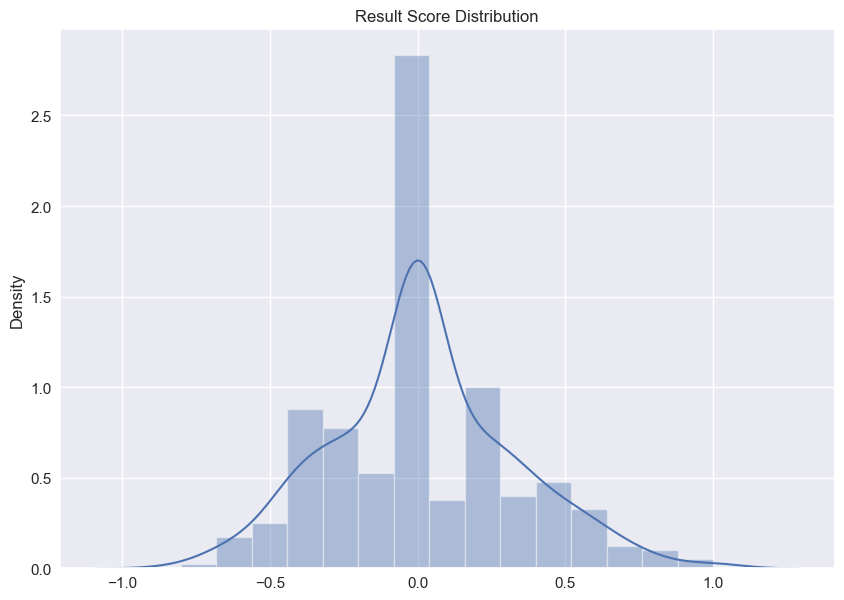

<AxesSubplot: xlabel='Date'>

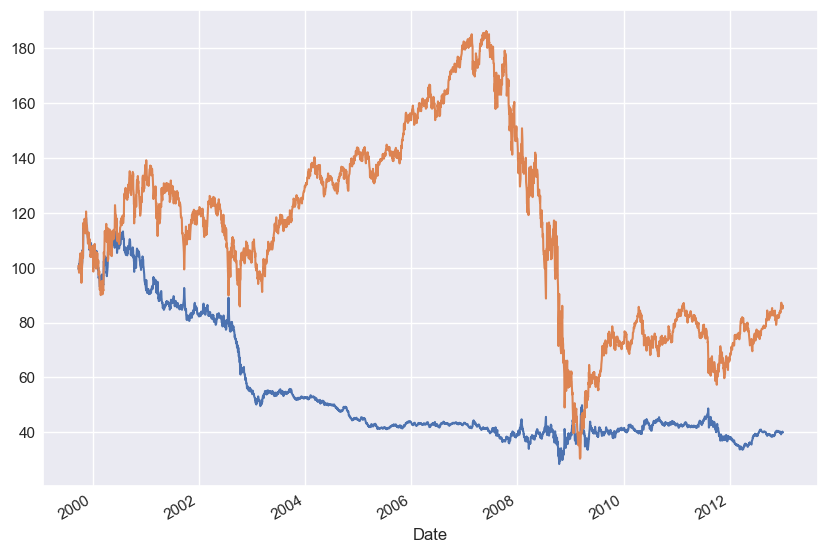

<IPython.core.display.Javascript object>

In [186]:
plot_scores(scores)
pd.Series(scores).describe()

equity_curve.plot()
benchmark.plot()

                           Strategy    Benchmark
-------------------------  ----------  -----------
Start Period               1999-09-24  1999-09-24
End Period                 2012-12-31  2012-12-31
Risk-Free Rate             0.0%        0.0%
Time in Market             99.0%       99.0%

Cumulative Return          -59.89%     -14.46%
CAGR﹪                     -6.65%      -1.17%

Sharpe                     -0.2        0.14
Prob. Sharpe Ratio         23.46%      69.15%
Smart Sharpe               -0.19       0.13
Sortino                    -0.28       0.2
Smart Sortino              -0.26       0.19
Sortino/√2                 -0.2        0.14
Smart Sortino/√2           -0.19       0.13
Omega                      0.96        0.96

Max Drawdown               -76.0%      -83.71%
Longest DD Days            4793        2037
Volatility (ann.)          22.29%      34.49%
R^2                        0.04        0.04
Information Ratio          -0.01       -0.01
Calmar                     -0.09     

None

Start      Valley         End  Days  Max Drawdown  99% Max Drawdown
1  1999-11-17  2008-10-14  2012-12-31  4793    -76.003694        -71.403691
2  1999-10-11  1999-10-15  1999-10-22    11     -7.114085         -4.991476
3  1999-11-08  1999-11-11  1999-11-16     8     -3.316540         -2.901453
4  1999-10-25  1999-10-26  1999-10-27     2     -2.145899         -0.780052
5  1999-10-29  1999-11-03  1999-11-05     7     -1.818403         -1.506577

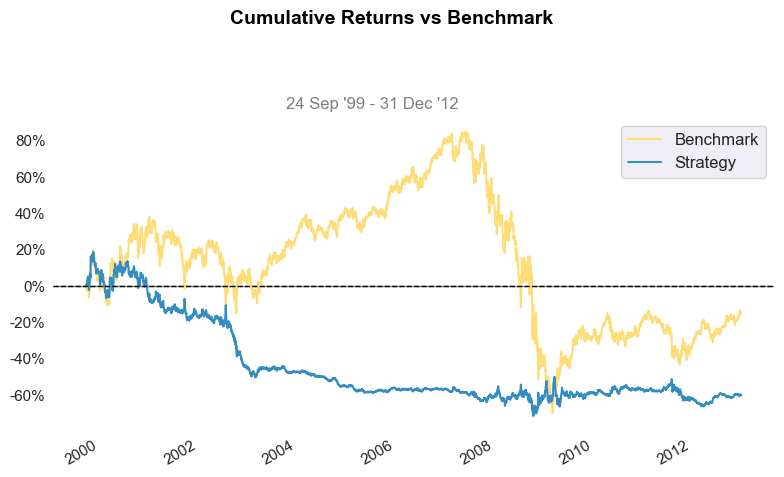

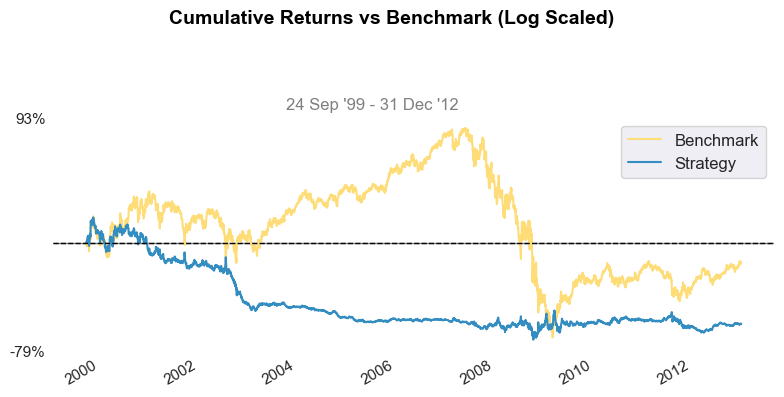

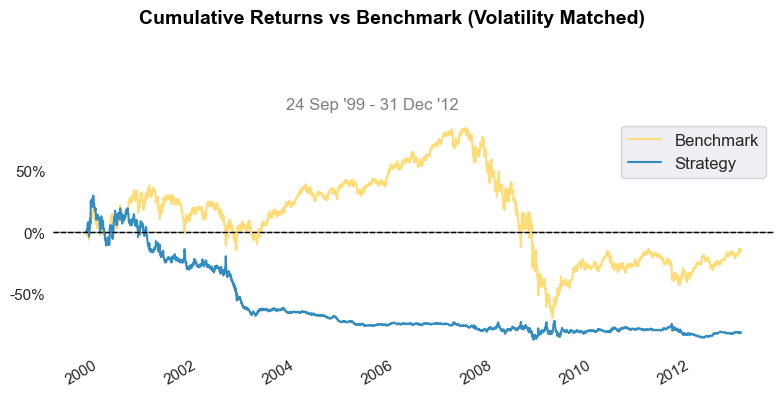

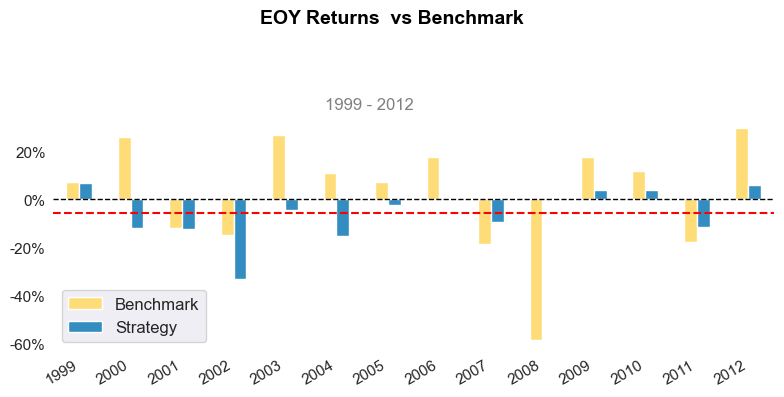

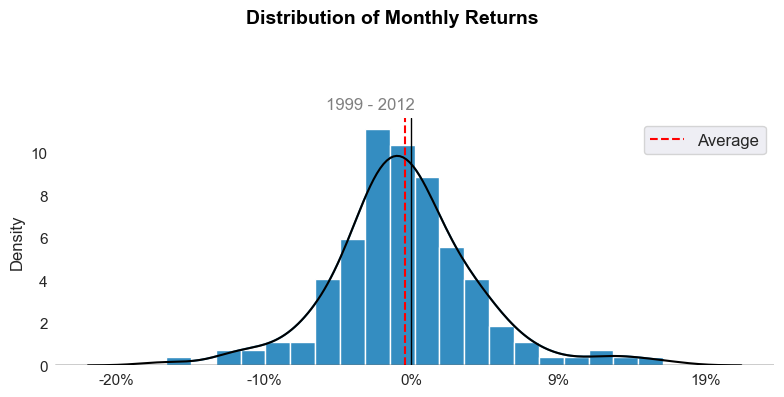

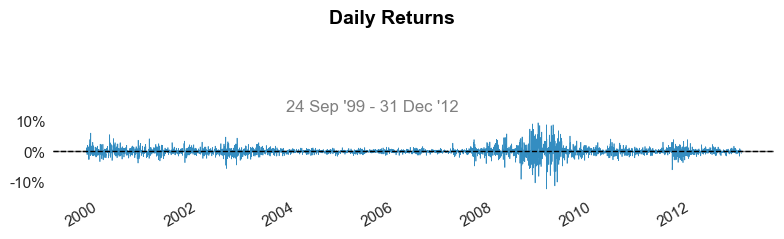

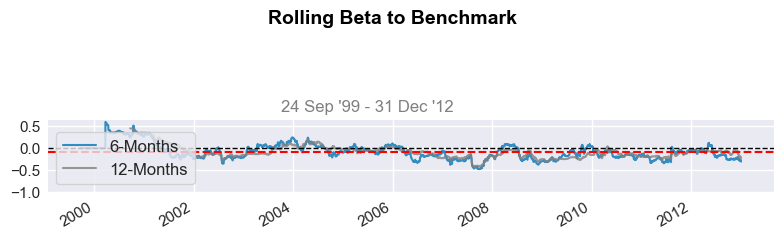

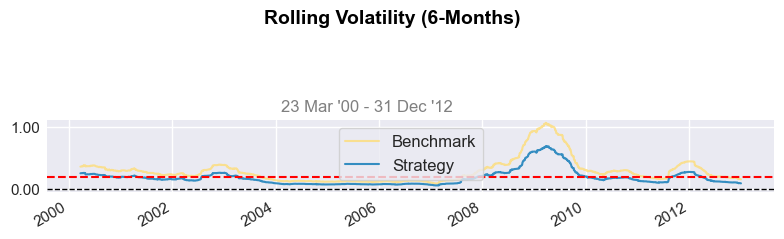

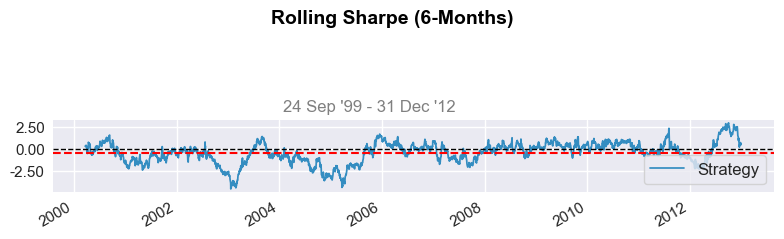

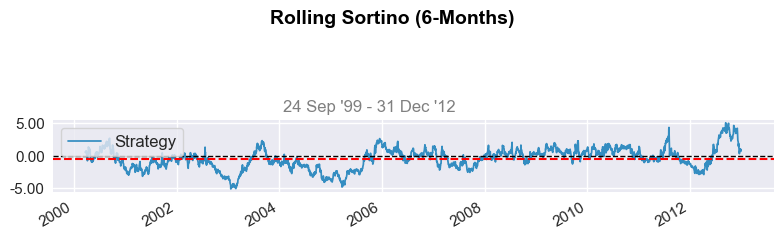

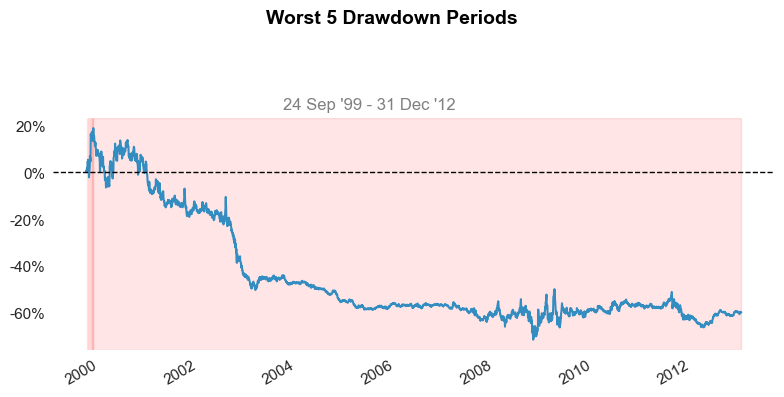

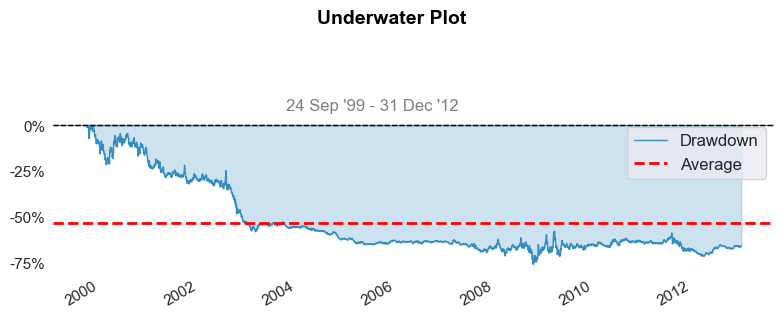

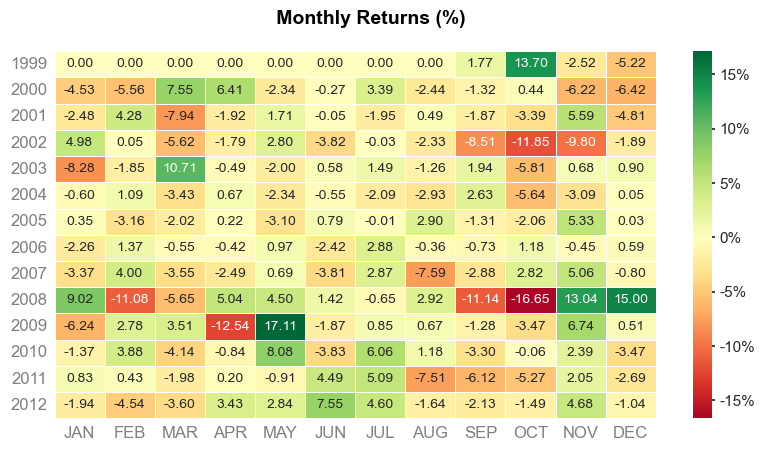

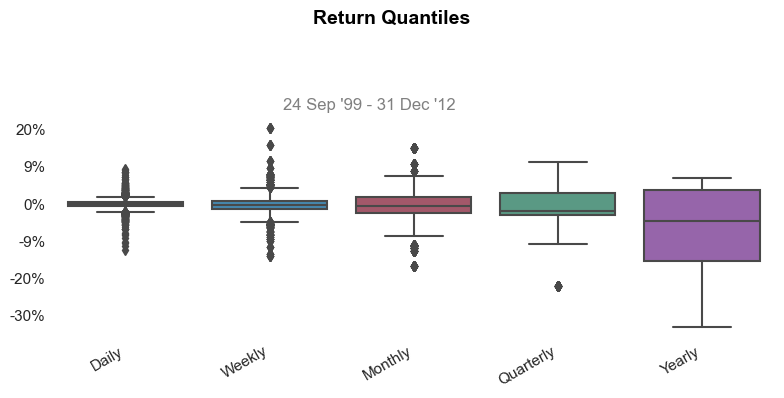

<IPython.core.display.Javascript object>

In [187]:
qs.reports.full(remove_timezone(equity_curve), remove_timezone(benchmark))

## let's attempt with tentative and selected

In [192]:
Feature_Selector.tentative

array(['volatility_atr', 'momentum_stoch', 'trend_kst_sig', 'trend_kst',
       'volume_em', 'trend_trix', 'volatility_kchi', 'volatility_dcl',
       'momentum_wr', 'volatility_ui', 'momentum_tsi', 'trend_psar_down',
       'momentum_ppo_signal'], dtype='<U19')

<IPython.core.display.Javascript object>

In [193]:
selected_features = set(
    list(Feature_Selector.tentative) + list(Feature_Selector.accepted)
)
selected_features

{'momentum_ao',
 'momentum_ppo_signal',
 'momentum_pvo_hist',
 'momentum_stoch',
 'momentum_tsi',
 'momentum_wr',
 'trend_kst',
 'trend_kst_sig',
 'trend_psar_down',
 'trend_trix',
 'volatility_atr',
 'volatility_dcl',
 'volatility_kchi',
 'volatility_ui',
 'volume_cmf',
 'volume_em'}

<IPython.core.display.Javascript object>

In [194]:
X, y = create_Xy(Xdf, selected_features, Y_TARGET_COL)
cprint(X)
cprint(y)

-------------------------------------------------------------------------------
dataframe information
-------------------------------------------------------------------------------
                           volatility_atr  momentum_stoch  trend_kst_sig  \
Date                                                                       
2012-12-24 00:00:00-05:00        0.131741       77.920553      20.191885   
2012-12-26 00:00:00-05:00        0.126627       74.447368      23.716416   
2012-12-27 00:00:00-05:00        0.136803       63.103593      27.135272   
2012-12-28 00:00:00-05:00        0.133198       45.636101      30.501201   
2012-12-31 00:00:00-05:00        0.139358       71.209811      33.676489   

                           trend_kst  volume_em  momentum_pvo_hist  \
Date                                                                 
2012-12-24 00:00:00-05:00  34.397564  -0.003050           0.412927   
2012-12-26 00:00:00-05:00  38.035145   0.001482          -2.475767   
2012-

<IPython.core.display.Javascript object>

## run walkforward

In [195]:
scores, predictions = walkforward_with_purging_and_embargos(
    model=create_model(),
    X=X,
    y=y,
    purged_window_size=0,
    embargo_period=2,
    lookback=100,
    test_size=10,
    scaler=StandardScaler(),
    scorer=matthews_corrcoef,
)

<IPython.core.display.Javascript object>

## Evaluate Results

In [196]:
# evaluate results
STARTING_VALUE = 100
equity_curve, equity_returns = get_estimated_backtests(
    predictions, actual_returns, starting_value=STARTING_VALUE
)
benchmark = returns_to_index(
    actual_returns.loc[equity_curve.index], starting_value=STARTING_VALUE
)

<IPython.core.display.Javascript object>

In [197]:
update_agg_results(
    hdf_store_fp,
    "selected_and_tentative_features_model",
    scores,
    equity_curve,
    equity_returns,
)

<IPython.core.display.Javascript object>

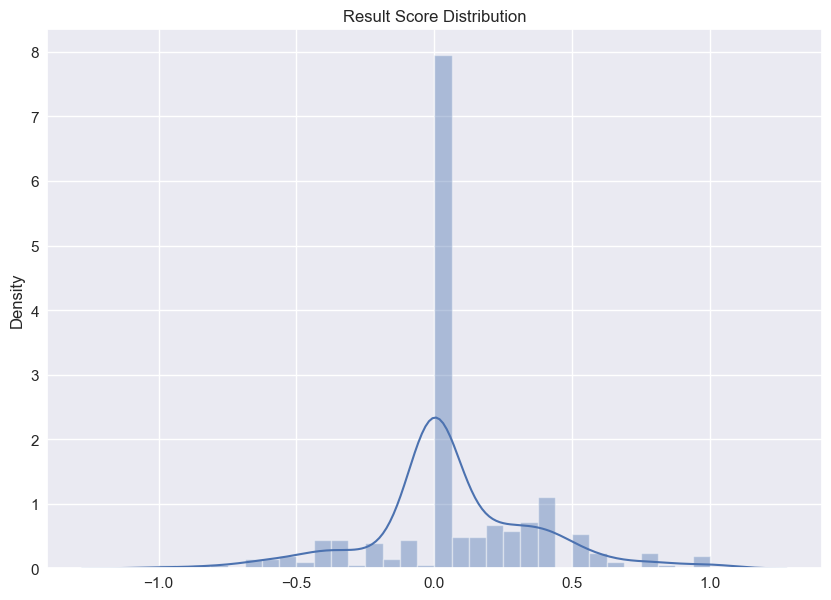

<AxesSubplot: xlabel='Date'>

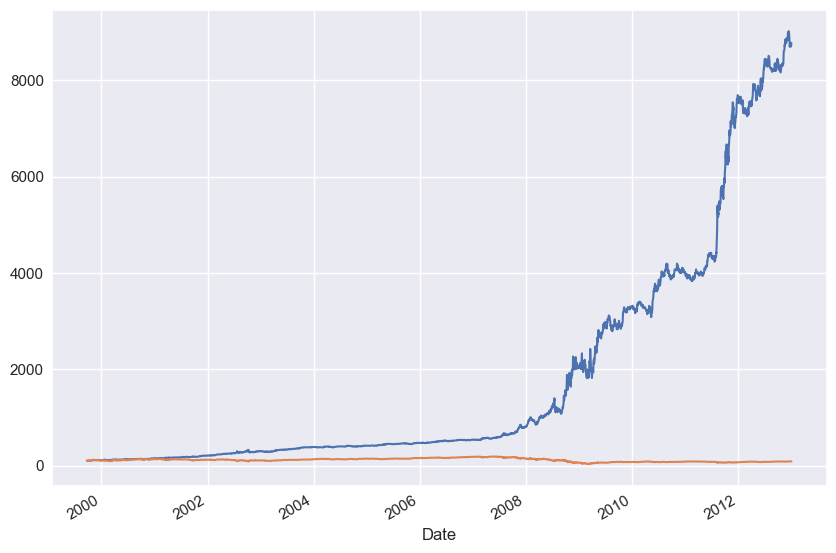

<IPython.core.display.Javascript object>

In [198]:
plot_scores(scores)
pd.Series(scores).describe()

equity_curve.plot()
benchmark.plot()

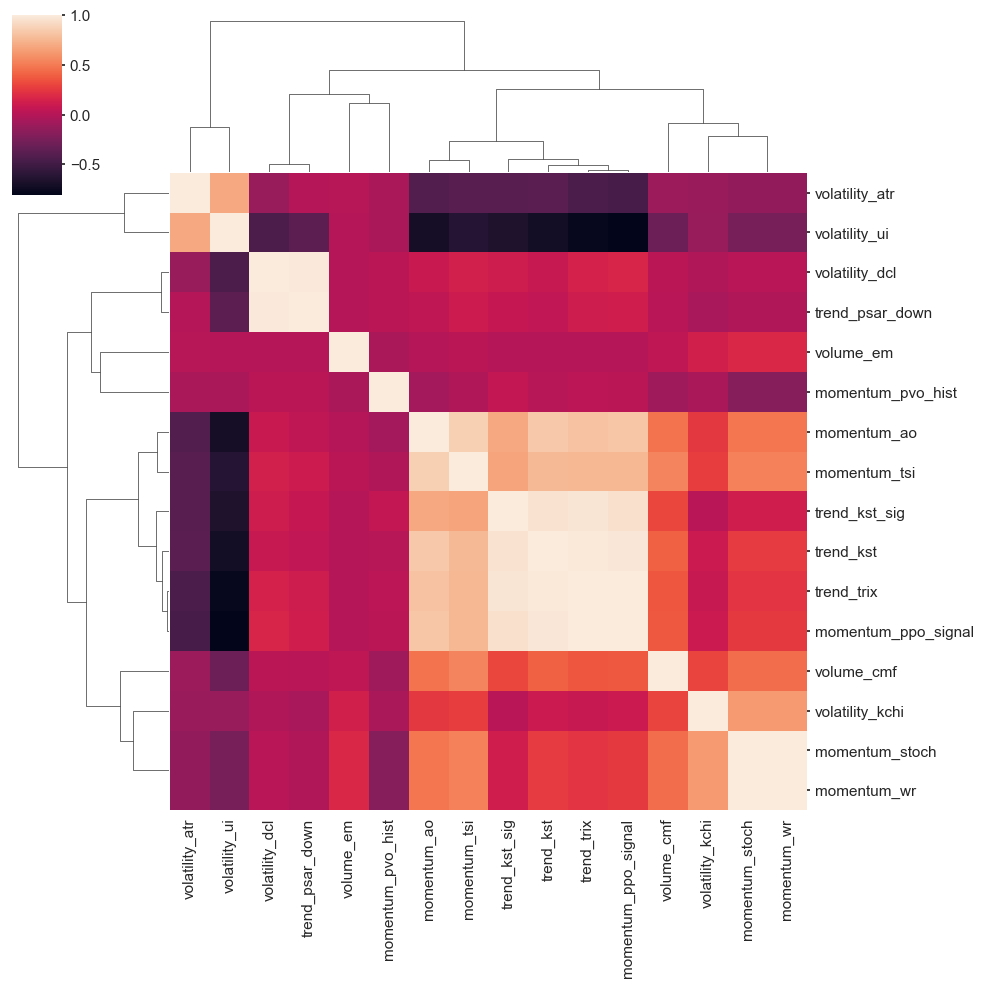

<IPython.core.display.Javascript object>

In [199]:
sns.clustermap(Xdf[selected_features].corr())

                           Strategy    Benchmark
-------------------------  ----------  -----------
Start Period               1999-09-24  1999-09-24
End Period                 2012-12-31  2012-12-31
Risk-Free Rate             0.0%        0.0%
Time in Market             99.0%       99.0%

Cumulative Return          8,628.54%   -14.46%
CAGR﹪                     40.01%      -1.17%

Sharpe                     1.65        0.14
Prob. Sharpe Ratio         100.0%      69.15%
Smart Sharpe               1.58        0.13
Sortino                    2.58        0.2
Smart Sortino              2.47        0.19
Sortino/√2                 1.82        0.14
Smart Sortino/√2           1.75        0.14
Omega                      1.41        1.41

Max Drawdown               -24.9%      -83.71%
Longest DD Days            217         2037
Volatility (ann.)          22.11%      34.49%
R^2                        0.04        0.04
Information Ratio          0.04        0.04
Calmar                     1.61       

None

Start      Valley         End  Days  Max Drawdown  99% Max Drawdown
1  2009-03-19  2009-03-30  2009-04-21    33    -24.903914        -21.925264
2  2008-07-16  2008-08-29  2008-09-18    64    -23.040749        -22.982414
3  2009-01-21  2009-02-23  2009-03-18    56    -22.114712        -21.751967
4  2002-10-10  2002-10-21  2003-05-15   217    -16.512479        -16.029110
5  2008-10-10  2008-10-14  2008-10-24    14    -16.337415        -11.725771

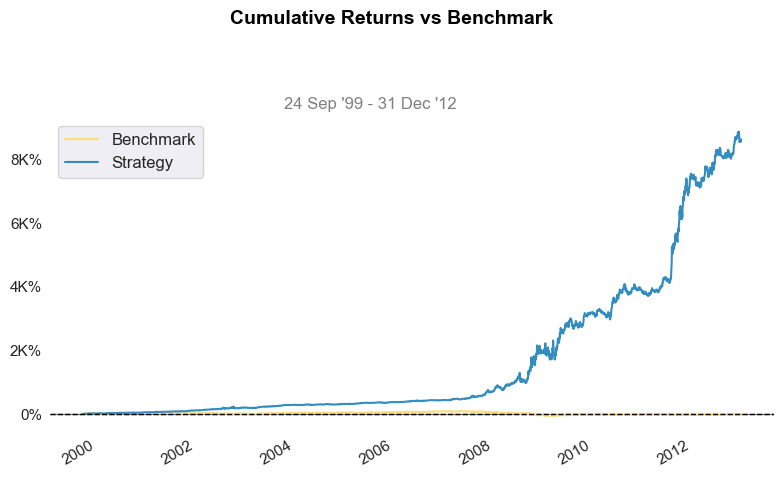

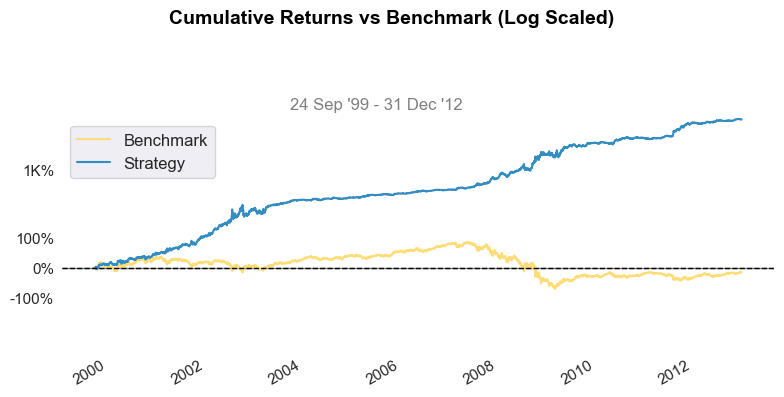

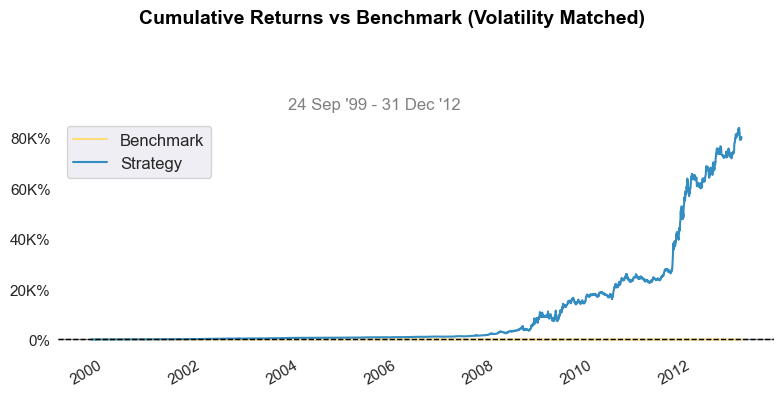

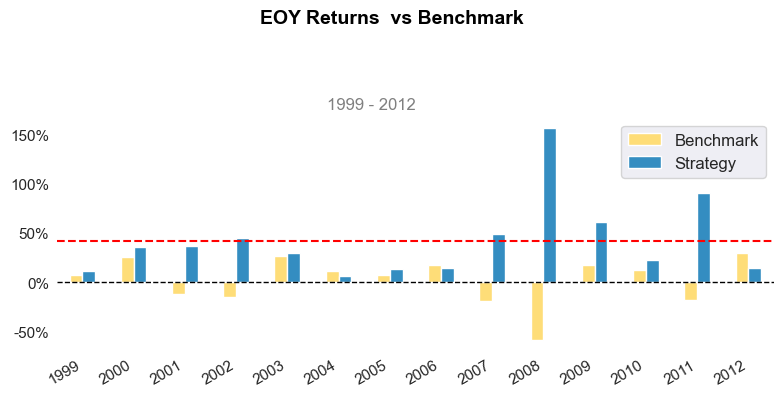

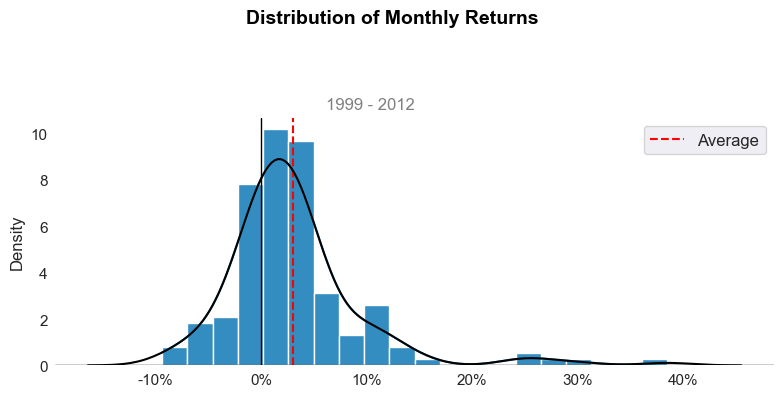

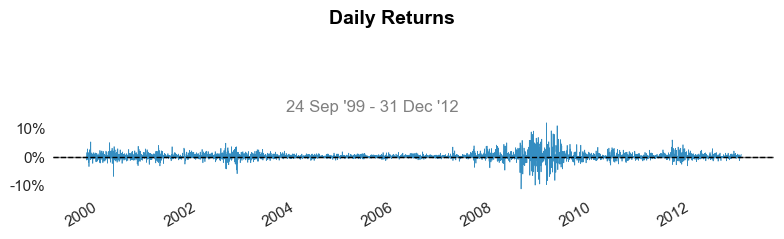

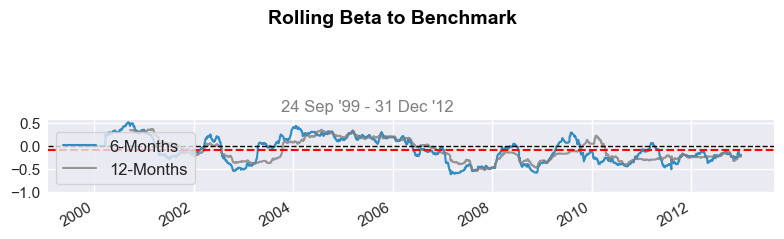

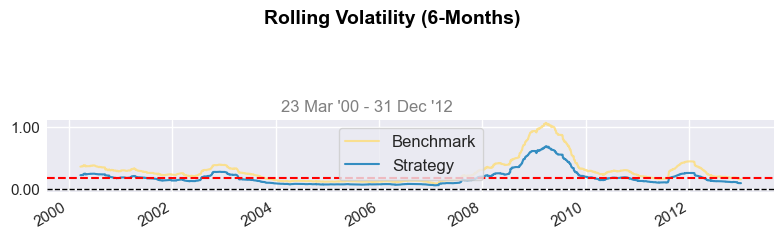

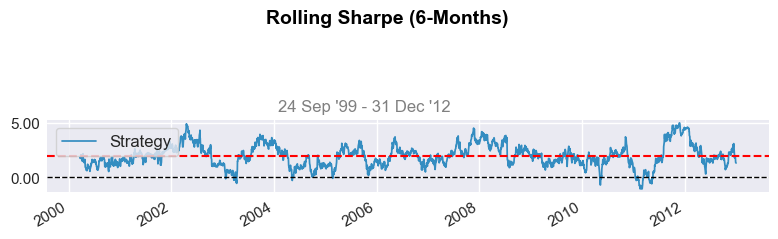

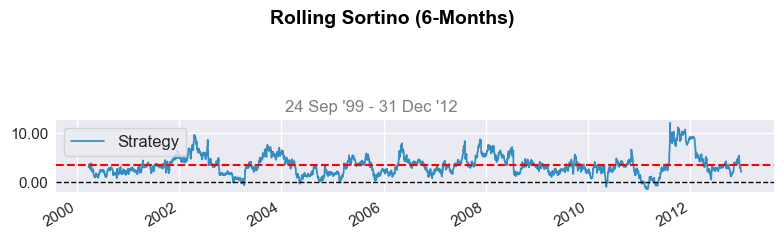

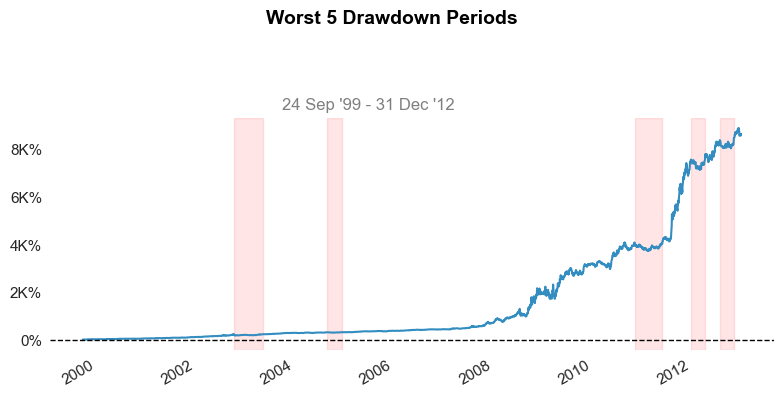

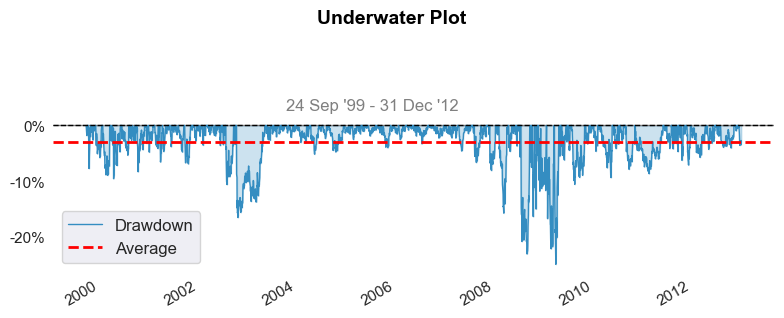

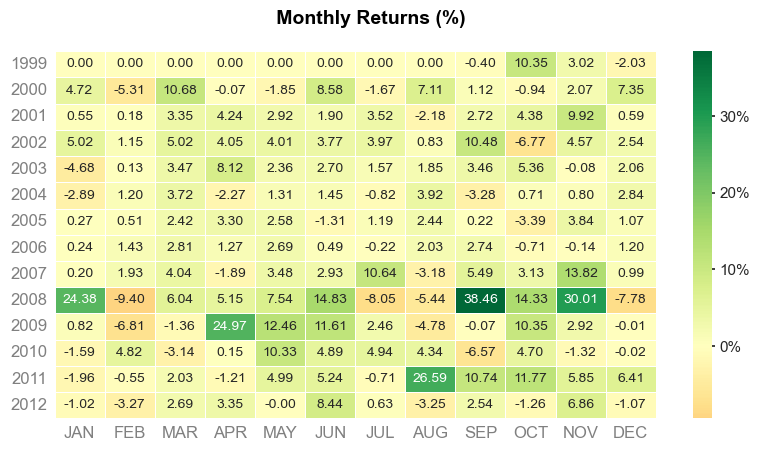

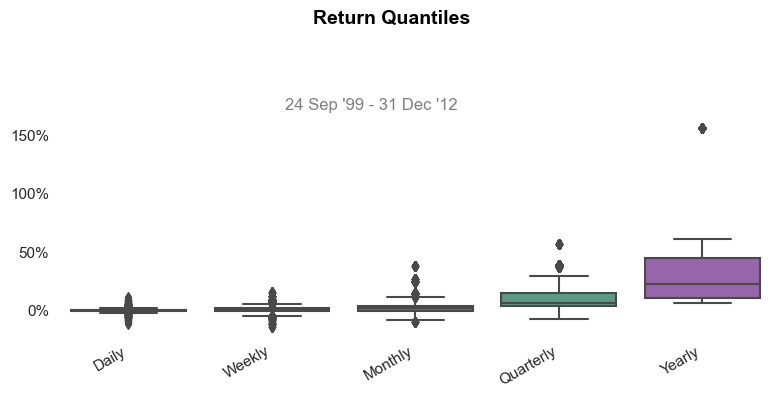

<IPython.core.display.Javascript object>

In [200]:
qs.reports.full(remove_timezone(equity_curve), remove_timezone(benchmark))

# Test model on Validation Set

In [207]:
df_validation[Y_TARGET_COL] = forward_returns.apply(np.sign)
df_validation = df_validation[df_validation[Y_TARGET_COL] != 0.0]
print(df_validation[Y_TARGET_COL].value_counts())

-1.0    443
 1.0    305
Name: fwd_8, dtype: int64


<IPython.core.display.Javascript object>

In [208]:
Xdf = (
    add_all_ta_features(
        df_validation.copy(),
        open="open",
        high="high",
        low="low",
        close="close",
        volume="volume",
    )
    .ffill()
    .dropna()
).drop(drop_cols, axis=1)

X, y = create_Xy(Xdf, selected_features, Y_TARGET_COL)
cprint(X)
cprint(y)

-------------------------------------------------------------------------------
dataframe information
-------------------------------------------------------------------------------
                           volatility_atr  momentum_stoch  trend_kst_sig  \
Date                                                                       
2015-12-24 00:00:00-05:00        0.280214       60.160044      -7.106038   
2015-12-28 00:00:00-05:00        0.267761       69.791855      -9.745958   
2015-12-29 00:00:00-05:00        0.260799       89.293499     -11.756990   
2015-12-30 00:00:00-05:00        0.249580       76.032810     -13.593109   
2015-12-31 00:00:00-05:00        0.247973       57.310997     -15.321250   

                           trend_kst  volume_em  momentum_pvo_hist  \
Date                                                                 
2015-12-24 00:00:00-05:00 -17.428221   0.065290          -8.455631   
2015-12-28 00:00:00-05:00 -17.365600  -0.094193         -11.607843   
2015-

<IPython.core.display.Javascript object>

## run walkforward

In [209]:
scores, predictions = walkforward_with_purging_and_embargos(
    model=create_model(),
    X=X,
    y=y,
    purged_window_size=0,
    embargo_period=2,
    lookback=100,
    test_size=10,
    scaler=StandardScaler(),
    scorer=matthews_corrcoef,
)

<IPython.core.display.Javascript object>

## evaluate results

In [210]:
# evaluate results
STARTING_VALUE = 100
equity_curve, equity_returns = get_estimated_backtests(
    predictions, actual_returns, starting_value=STARTING_VALUE
)
benchmark = returns_to_index(
    actual_returns.loc[equity_curve.index], starting_value=STARTING_VALUE
)

<IPython.core.display.Javascript object>

In [211]:
update_agg_results(
    hdf_store_fp,
    "validation_selected_and_tentative_features_model",
    scores,
    equity_curve,
    equity_returns,
)

<IPython.core.display.Javascript object>

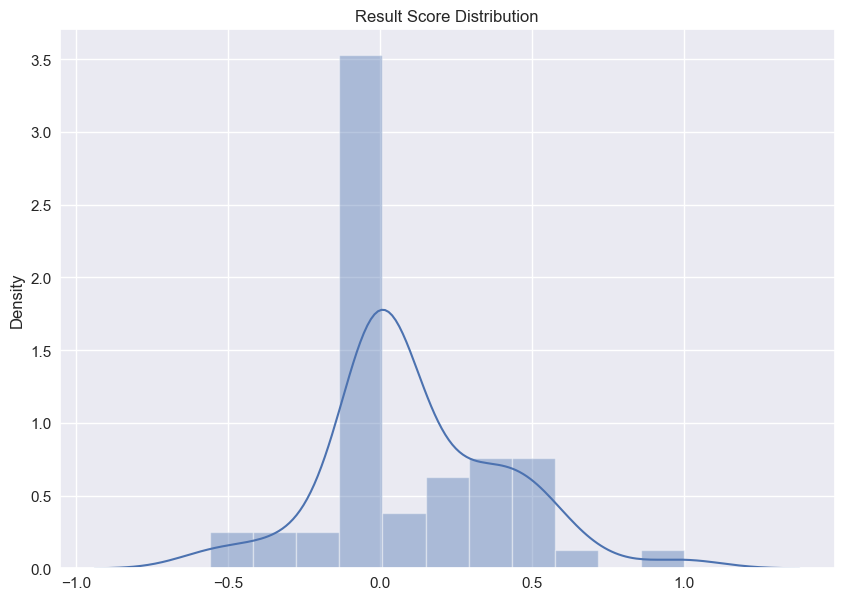

<AxesSubplot: xlabel='Date'>

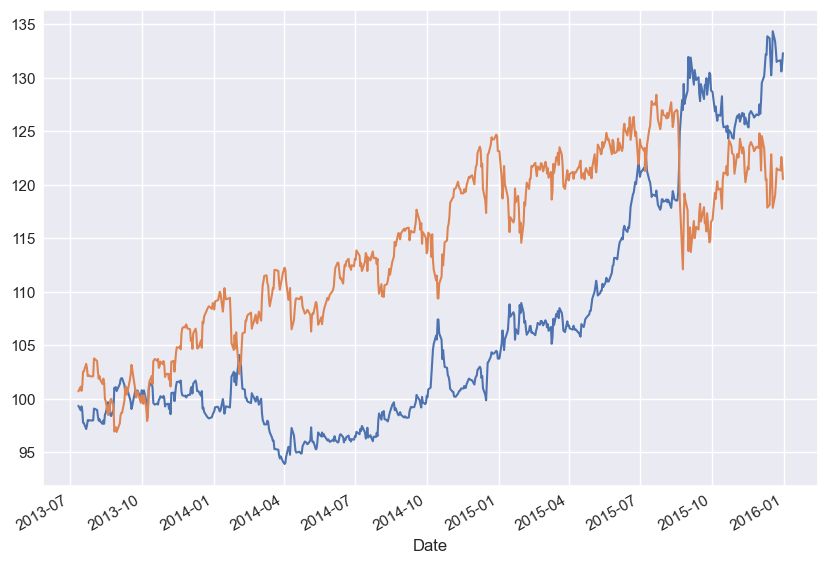

<IPython.core.display.Javascript object>

In [212]:
plot_scores(scores)
pd.Series(scores).describe()

equity_curve.plot()
benchmark.plot()

                           Strategy    Benchmark
-------------------------  ----------  -----------
Start Period               2013-07-12  2013-07-12
End Period                 2015-12-31  2015-12-31
Risk-Free Rate             0.0%        0.0%
Time in Market             98.0%       98.0%

Cumulative Return          33.19%      19.71%
CAGR﹪                     12.3%       7.55%

Sharpe                     1.18        0.57
Prob. Sharpe Ratio         96.97%      81.19%
Smart Sharpe               1.18        0.57
Sortino                    1.89        0.8
Smart Sortino              1.88        0.8
Sortino/√2                 1.34        0.57
Smart Sortino/√2           1.33        0.57
Omega                      1.23        1.23

Max Drawdown               -9.79%      -12.71%
Longest DD Days            247         161
Volatility (ann.)          10.39%      14.88%
R^2                        0.21        0.21
Information Ratio          0.01        0.01
Calmar                     1.26        0.5

None

Start      Valley         End  Days  Max Drawdown  99% Max Drawdown
1  2014-02-04  2014-04-02  2014-10-09   247     -9.789042         -9.671990
2  2014-10-17  2014-12-16  2015-01-14    89     -7.031889         -6.725818
3  2015-09-02  2015-10-29  2015-12-09    98     -5.791067         -5.787828
4  2015-07-09  2015-07-27  2015-08-21    43     -4.368508         -4.225481
5  2013-09-09  2013-12-26  2014-01-24   137     -3.683878         -3.661342

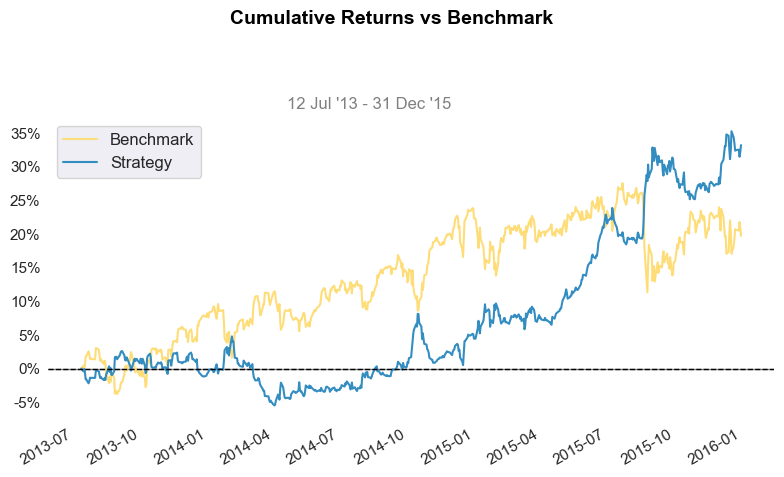

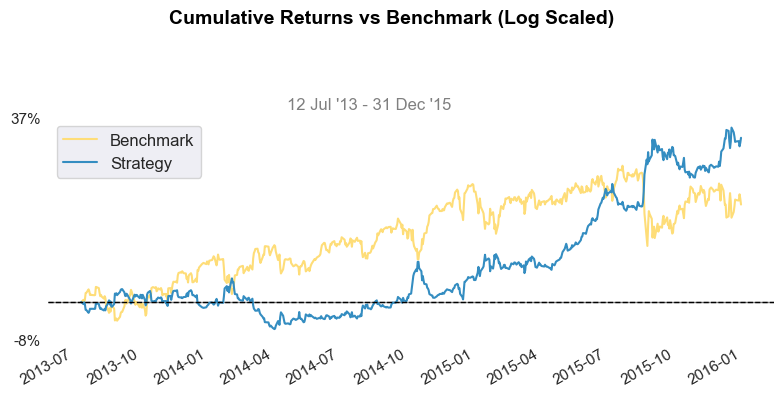

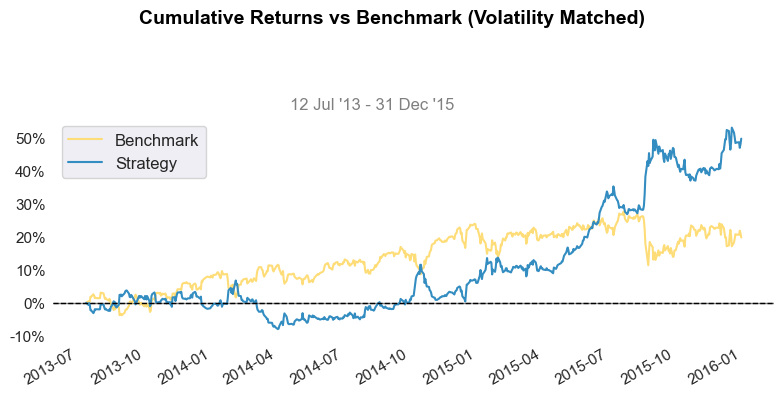

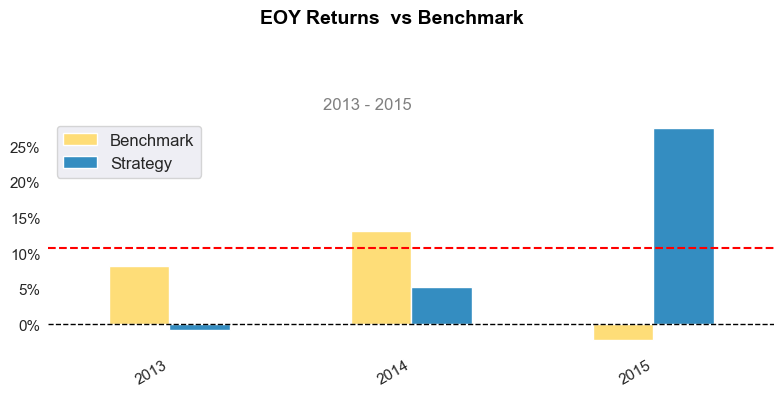

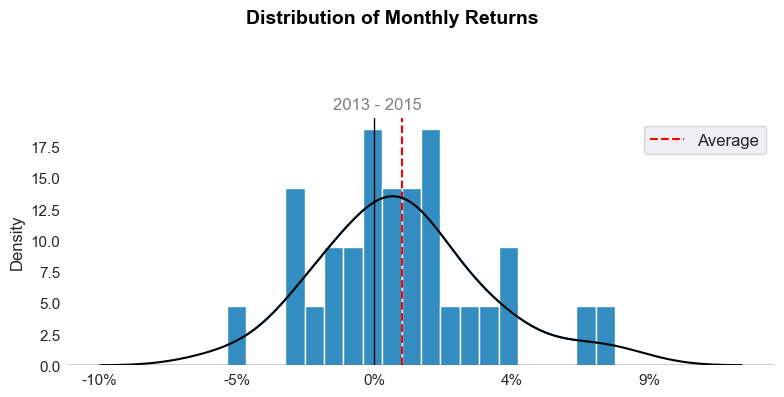

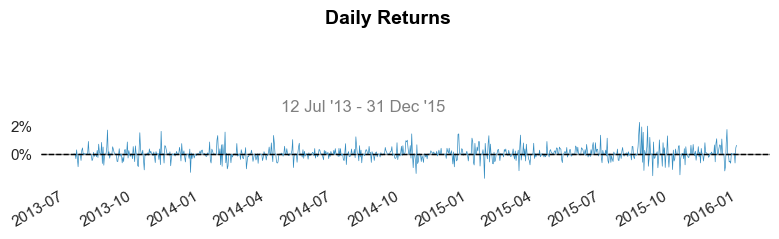

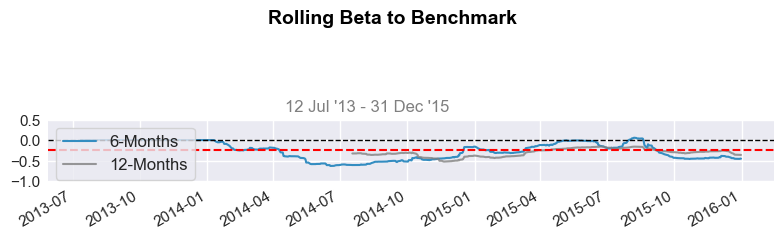

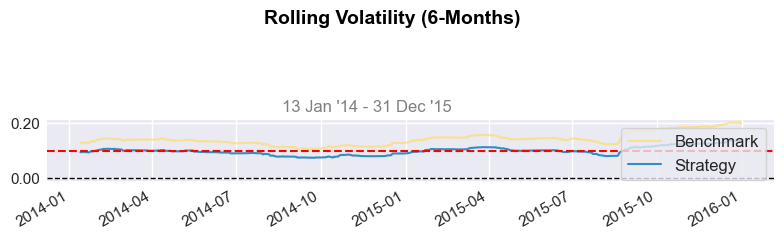

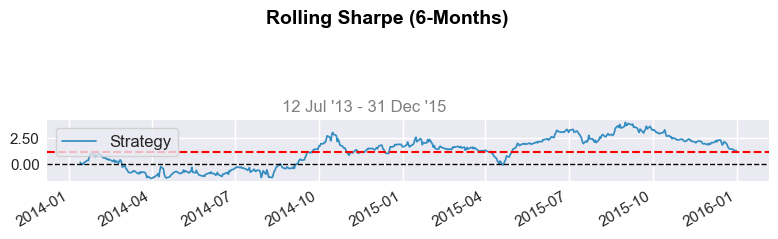

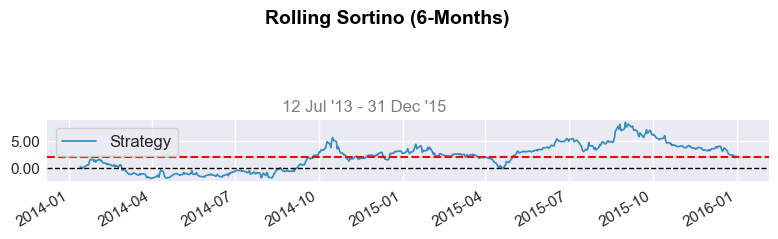

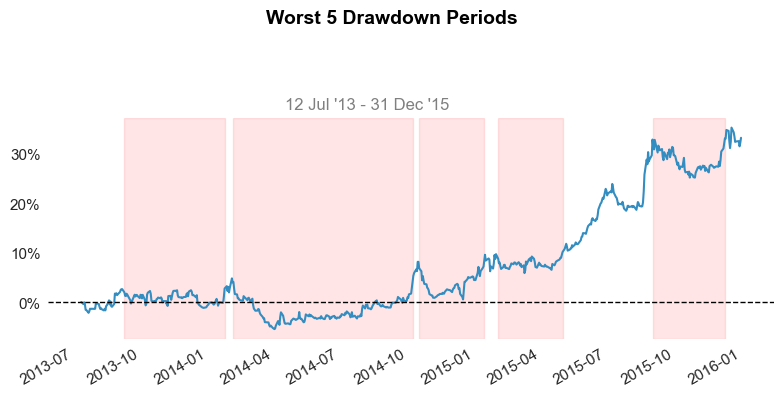

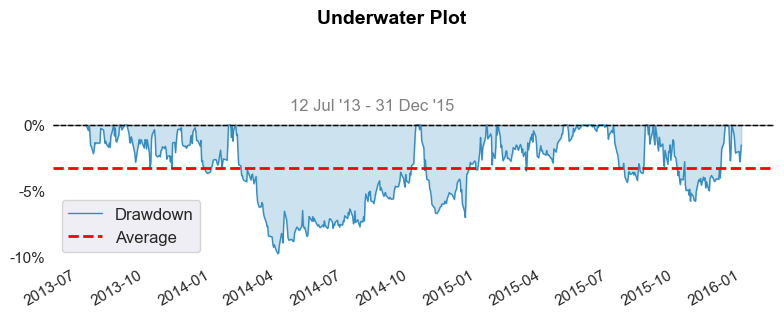

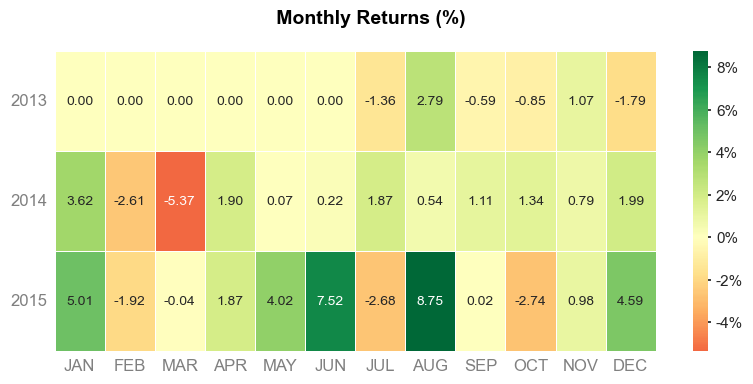

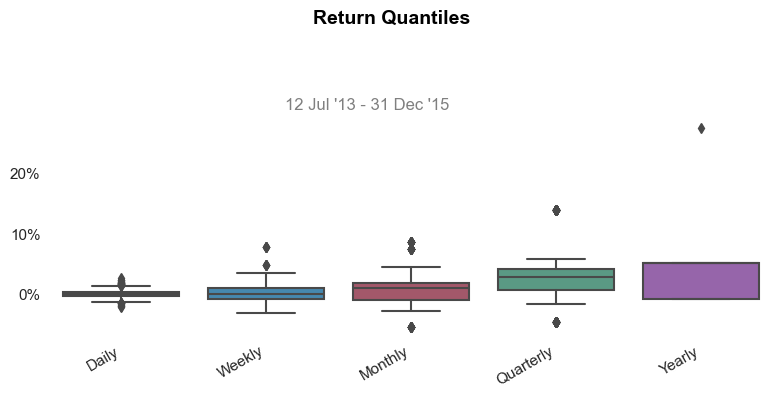

<IPython.core.display.Javascript object>

In [213]:
qs.reports.full(remove_timezone(equity_curve), remove_timezone(benchmark))